<div class="alert alert-block alert-info">
<center> <h1> MACHINE LEARNING </h1> </center> <br>
<center> BOOKME PROJECT PART 2 2021/2022 </center>

**GROUP 21:** <br>
- Nuno Bolas          `20211052` <br>
- João Magalhães      `20211044` <br>
- Mariana Teixeira    `20211058` <br>
- Maria Trindade      `20211049` <br>

<a id='toc'></a>


**Table of Contents** <br>
* [1. Import](#import)-
    * [1.1. Import Libraries](#importlibraries)-
    * [1.2. Import Datasets](#importdatasets)-
* [2. Initial Analysis](#initialanalysis)-
* [3. Definition of the initial Metric and Non-metric Features](#defeatures)-
* [4. Impute Missing Values on Non-Metric Features](#imputeMV)-
* [5. Further Analysis](#FurtherAnalysis)-
* [6. Variables' Distribution](#VarsDistribution)-
    * [6.1. Categorical Variables - Histograms](#CatVarDist)-
    * [6.2. Numeric Variables - Histograms](#NumVarDist)-
    * [6.3. Numeric Variables - Boxplots](#NumVarBox)-
* [7. Coherence Checking](#Check)-
* [8. Transform Variables](#TransformVar)-
* [9. Coherence Checking - Age](#CheckAge)-
* [10. Outlier Removal](#outlier)-
    * [10.1. Outlier Removal - Defining Features](#outdefeatures)-
    * [10.2. Outlier Removal - Filtering](#outfiltering)-
         * [10.2.1. Filters 1 - Manual](#manual)-
         * [10.2.2. Filters 2 - IQR](#iqr)-
         * [10.2.3. Filters 3 - Z-score](#zscore)-
* [11. Encoding - OneHotEncoder](#encoding) 
* [12. Standardization](#standardization)-
    * [12.1. Standard Scaler](#standard)-
    * [12.2. MinMax Scaler](#minmax)-
* [13. Input Variables and Target Split](#inputtarget)-  
* [14. Feature Selection](#featureselection) -
    * [14.1. Correlation's: Pearson and Spearman](#corr)-
    * [14.2. Recursive Feature Elimination - RFE](#rfe)-
    * [14.3. LASSO Regression](#lasso)-  
    * [14.4. RIDGE Regression](#ridge) -
    * [14.5. Chi-Square](#chisquare)-
    * [14.6. Principal Components Analysis - PCA](#pca) 
    * [14.7. ANOVA F-Values](#anova) - 
    * [14.8. Feature Importances - Tree Based Classifiers](#featimportance) -
    * [14.9. Gini Importance | Entropy Importance](#ginientropy) -
    * [14.11. AdaBoost Feature Importances](#adaboost) -
    * [14.12. Feature Selection with Stratified Kfold](#fs2) 
* [15. Final Selected Features](#selectedfeatures)   
    * [15.1. Split into X (Input variables) and y (Target)](#xy)
* [16. Train Test Split](#traintestsplit)  
* [16. Models](#models)
    * [16.1. K-Fold and Repeated K-Fold parameters](#kfoldrkfold)
    * [16.2. Multi-Layer Perceptron](#nn)
    * [16.3. Random Forest](#rf)   
    * [16.4. Logistic Regression](#log) 
    * [16.5. K Neighbors Classifier](#knn)
    * [16.6. Decision Trees](#dt)
    * [16.7. Naive Bayes](#nb)
    * [16.8. Support Vector Machine - SVC (Classifier)](#svm)
    * [16.9.1. Extra Trees](#bagg)
    * [16.10. AdaBoost Classifier](#adaboostclassifier)
    * [16.10. Gradient Boosting Classifier](#gradientboost)
* [17. Models Comparison](#modelscomparison)
* [18. Predictions](#predictions)

[BACK TO TOC](#toc)
    
<a id='import'></a>

# <font color = 'darkblue'> 1. Import </font>

<a class="anchor" id="importlibraries">

## 1.1. Import Libraries

</a>

In [1]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
import re
import math
from datetime import date
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_samples,silhouette_score

# feature selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression,  Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from functools import reduce

#Models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score 
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC

In [2]:
# Set the style for the Seaborn's plots
sns.set_style('whitegrid',{
    'xtick.bottom': False,
    'xtick.color': '.1',
    'xtick.direction': 'out',
    'xtick.top': False,
    'xtick.major.size': 1,
    'xtick.minor.size': 0.5,
    'ytick.left': True,
    'ytick.color': '.1',
    'ytick.direction': 'out',
    'ytick.right': False,
    'ytick.major.size': 1,
    'ytick.minor.size': 0.5,    
    'ytick.color': '.1',
    'grid.linestyle': '--',
    'axes.edgecolor': '.1',
    'grid.color': '0.8'
 })

palette = sns.color_palette("Set2") 
sns.set_palette(palette)

<a class="anchor" id="importdatasets">

## 1.1. Import Datasets

</a>

In [3]:
train = pd.read_csv("data/train.csv")

In [4]:
train.head(5)

,Cust_ID,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,1,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,...,4,3,4,3,3,3,3,4,3,4
1,2,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,...,5,3,4,5,5,5,5,1,5,2
2,3,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,...,1,4,4,3,3,2,3,2,3,1
3,4,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,...,4,4,5,4,4,4,4,4,4,3
4,5,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,...,5,5,5,5,5,3,4,1,3,5


[BACK TO TOC](#toc)
    
<a id='initialanalysis'></a>

# <font color = 'darkblue'> 2. Initial Analysis </font>

In [5]:
train = train.set_index("Cust_ID")

In [6]:
# descriptive statistics for the variables 
train.describe(include="all")

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
count,15589,15589,15589,15394.000000,15589,15589,15589.000000,15589.000000,15589.000000,15589.000000,...,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000
unique,2,14227,3,NaN,2,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,nochurn,Mr. Michael Smith,yes,NaN,business,single,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8477,9,12548,NaN,10756,7442,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1981.706444,NaN,NaN,5022.593816,2.841619,2.997242,2.844570,...,3.245109,3.374816,3.506383,3.454231,3.459683,3.470845,3.700558,3.327282,3.692347,3.347360
std,NaN,NaN,NaN,15.179042,NaN,NaN,1027.962379,1.388624,1.518994,1.436948,...,1.327026,1.352417,1.319565,1.310343,1.268130,1.293873,1.158644,1.266872,1.154437,1.300452
min,NaN,NaN,NaN,1936.000000,NaN,NaN,409.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,NaN,NaN,NaN,1970.000000,NaN,NaN,4445.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,NaN,NaN,NaN,1981.000000,NaN,NaN,5088.000000,3.000000,3.000000,3.000000,...,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,NaN,NaN,NaN,1994.000000,NaN,NaN,5649.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000


In [7]:
train.groupby(["TypeTravel","RoomType"]).count()["Name"]

TypeTravel  RoomType
business    double      3022
            single      7119
            suite        615
leisure     double      3999
            single       323
            suite        511
Name: Name, dtype: int64

In [8]:
train.groupby(["Churn","Longevity"]).count()["Name"]

Churn    Longevity
churn    no           2185
         y              53
         yes          4874
nochurn  no            689
         y             114
         yes          7674
Name: Name, dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15589 entries, 1 to 15589
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              15589 non-null  object 
 1   Name               15589 non-null  object 
 2   Longevity          15589 non-null  object 
 3   Year_Birth         15394 non-null  float64
 4   TypeTravel         15589 non-null  object 
 5   RoomType           15589 non-null  object 
 6   RewardPoints       15589 non-null  int64  
 7   Comfort            15589 non-null  int64  
 8   ReceptionSchedule  15589 non-null  int64  
 9   FoodDrink          15589 non-null  int64  
 10  Location           15589 non-null  int64  
 11  Wifi               15589 non-null  int64  
 12  Amenities          15589 non-null  int64  
 13  Staff              15589 non-null  int64  
 14  OnlineBooking      15589 non-null  int64  
 15  PriceQuality       15589 non-null  int64  
 16  RoomSpace          155

In [10]:
# Duplicated records
print('Train: \n',train.duplicated().value_counts(),'\n')

Train: 
 False    15586
True         3
dtype: int64 



In [11]:
train.drop_duplicates(inplace=True)

In [12]:
# Missing Values on train dataset
train.isna().sum()

Churn                  0
Name                   0
Longevity              0
Year_Birth           195
TypeTravel             0
RoomType               0
RewardPoints           0
Comfort                0
ReceptionSchedule      0
FoodDrink              0
Location               0
Wifi                   0
Amenities              0
Staff                  0
OnlineBooking          0
PriceQuality           0
RoomSpace              0
CheckOut               0
Checkin                0
Cleanliness            0
BarService             0
dtype: int64

<hr>
<a class="anchor" id="defeatures">
    
# <font color = 'darkblue'> 3. Definition of the initial Metric and Non-metric Features </font> 
    
</a>

In [13]:
metric_features = ['Year_Birth','RewardPoints','Comfort','ReceptionSchedule','FoodDrink','Location','Wifi','Amenities','Staff','OnlineBooking','PriceQuality','RoomSpace','CheckOut','Checkin','Cleanliness','BarService']
non_metric_features = ['Name','Longevity','TypeTravel','RoomType']

#Satisfaction values

satisfaction = ['Comfort','ReceptionSchedule','FoodDrink','Location','Wifi','Amenities','Staff','OnlineBooking','PriceQuality','RoomSpace','CheckOut','Checkin','Cleanliness','BarService']

<hr>
<a class="anchor" id="imputeMV">

# <font color = 'darkblue'> 4. Impute Missing Values Non-metric Features </font> 
</a>

In [14]:
data_numerical = train.select_dtypes(include='number')
train_copy = train.copy()

In [15]:
data_numerical.columns

Index(['Year_Birth', 'RewardPoints', 'Comfort', 'ReceptionSchedule',
       'FoodDrink', 'Location', 'Wifi', 'Amenities', 'Staff', 'OnlineBooking',
       'PriceQuality', 'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness',
       'BarService'],
      dtype='object')

__Studying the missing values patterns__

In [16]:
#df_nas = train_copy[train_copy["Year_Birth"].isna()][['Female','Churn','Longevity','TypeTravel']]

In [17]:
#fig, axes = plt.subplots(2, 2)

#sns.histplot(df_nas, x="Gender",hue="Gender", ax=axes[0,0])
#plt.xlabel("Gender")
#plt.ylabel("Total of NAs")

#sns.histplot(df_nas, x="Churn",hue="Churn", ax=axes[0,1])
#plt.xlabel("Churn")
#plt.ylabel("Total of NAs")

#sns.histplot(df_nas, x="Longevity",hue="Longevity", ax=axes[1,0])
#plt.xlabel("Longevity")
#plt.ylabel("Total of NAs")

#sns.histplot(df_nas, x="TypeTravel",hue="TypeTravel", ax=axes[1,1])
#plt.xlabel("TypeTravel")
#plt.ylabel("Total of NAs")

Most Nas are women, so we assume they might have been comfortable answering this question, the best way to deal with this would be with KNN Imputer. Regarding the Churn, Longevity, we can't find any pattern here. As for Type Travel, most clients are in business, which could mean they don't want to disclusure personal informations.

__Imputing the Missing Values__

In [18]:
imputer = KNNImputer(n_neighbors=5, weights="uniform").fit(data_numerical)
imputed_matrix = imputer.transform(data_numerical)

data_cleaned = pd.DataFrame(data=imputed_matrix, columns=data_numerical.columns, index=data_numerical.index)

In [19]:
train_copy[data_cleaned.columns] = data_cleaned

In [20]:
train_copy.isna().sum()

Churn                0
Name                 0
Longevity            0
Year_Birth           0
TypeTravel           0
RoomType             0
RewardPoints         0
Comfort              0
ReceptionSchedule    0
FoodDrink            0
Location             0
Wifi                 0
Amenities            0
Staff                0
OnlineBooking        0
PriceQuality         0
RoomSpace            0
CheckOut             0
Checkin              0
Cleanliness          0
BarService           0
dtype: int64

<hr>
<a class="anchor" id="FurtherAnalysis">
    
# <font color = 'darkblue'> 5. Further Analysis </font>
    
</a>

In [21]:
train.Name.value_counts()

Mr. Michael Smith     9
Mr. John Smith        7
Ms. Amanda Smith      7
Mr. Michael Davis     6
Ms. Jennifer Smith    6
                     ..
Ms. Laurie Smith      1
Mr. Aaron Cox         1
Ms. Natasha Estes     1
Ms. Beverly Lee       1
Mr. Steven Mendez     1
Name: Name, Length: 14227, dtype: int64

In [22]:
print('Yougest:',train.Year_Birth.max())
print('Oldest:',train.Year_Birth.min())

Yougest: 2014.0
Oldest: 1936.0


In [23]:
train['Longevity'].value_counts() 

yes    12545
no      2874
y        167
Name: Longevity, dtype: int64

In [24]:
train['TypeTravel'].value_counts()

business    10754
leisure      4832
Name: TypeTravel, dtype: int64

In [25]:
train['RoomType'].value_counts()

single    7442
double    7019
suite     1125
Name: RoomType, dtype: int64

In [26]:
print('Highest Reward Points:',train.RewardPoints.max())
print('Lowest Reward Points:',train.RewardPoints.min())

Highest Reward Points: 6950
Lowest Reward Points: 409


In [27]:
train[satisfaction].describe()

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
count,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000
mean,2.841332,2.997049,2.844412,2.985821,3.244963,3.374631,3.506288,3.454190,3.459579,3.470871,3.700500,3.327409,3.692288,3.347427
std,1.388541,1.519035,1.436937,1.299438,1.327064,1.352419,1.319625,1.310401,1.268180,1.293782,1.158693,1.266944,1.154484,1.300371
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


<hr>
<a class="anchor" id="VarsDistribution">
    
# <font color = 'darkblue'> 6. Variables' Distribution </font>
    
</a>

<a class="anchor" id="CatVarDist">

## 6.1. Categorical Variables - Histograms

</a>

In [28]:
cat_var_list = train[non_metric_features].drop(columns=["Name"]).columns

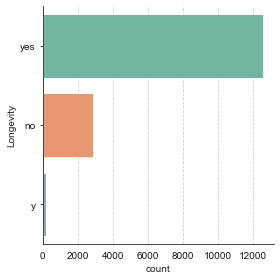

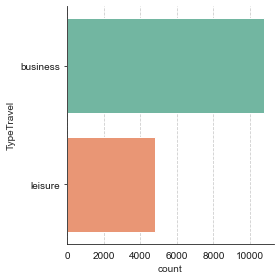

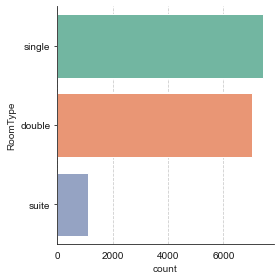

In [29]:
for i in range(len(cat_var_list)):
    sns.catplot(data=train,y=cat_var_list[i],kind="count", height = 4, aspect=1)
plt.show()

<a class="anchor" id="NumVarDist">

## 6.2. Numeric Variables - Histograms

</a>

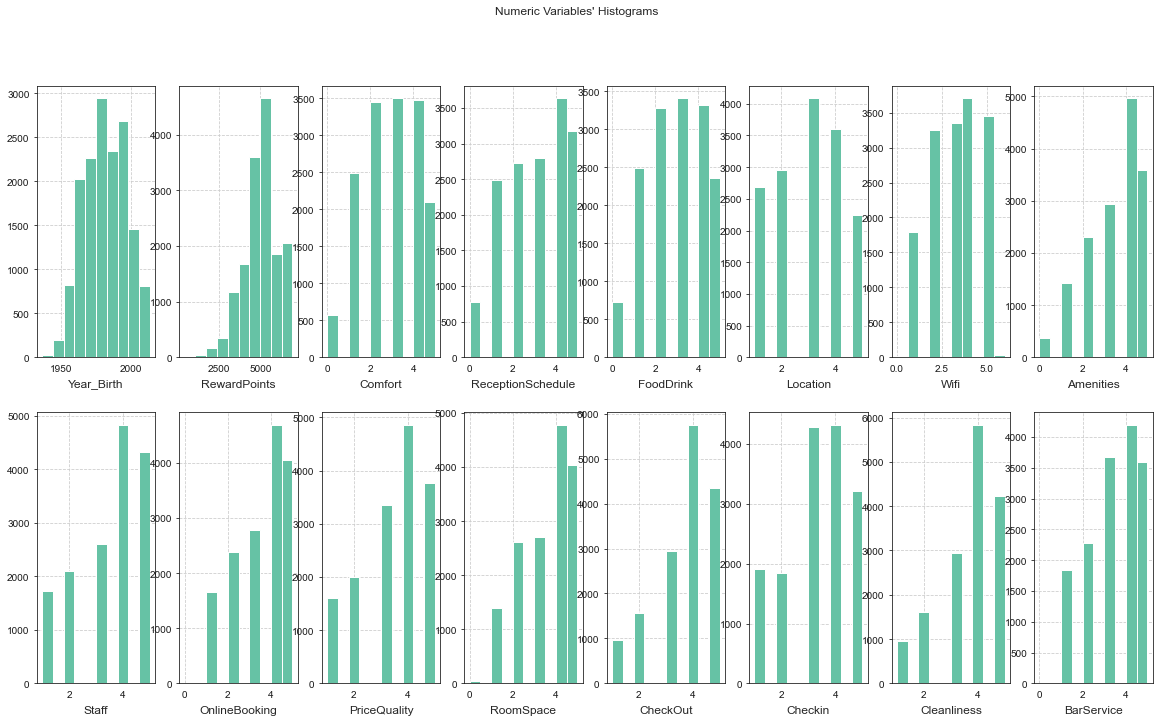

In [30]:
fig, axes = plt.subplots(2, math.ceil(len(metric_features) / 2), figsize=(20, 11))

for ax, feat in zip(axes.flatten(), metric_features): 
    ax.hist(train_copy[feat])
    ax.set_title(feat, y=-0.13)
    
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

<a class="anchor" id="NumVarBox">

## 6.3. Numeric Variables - Boxplots

</a>

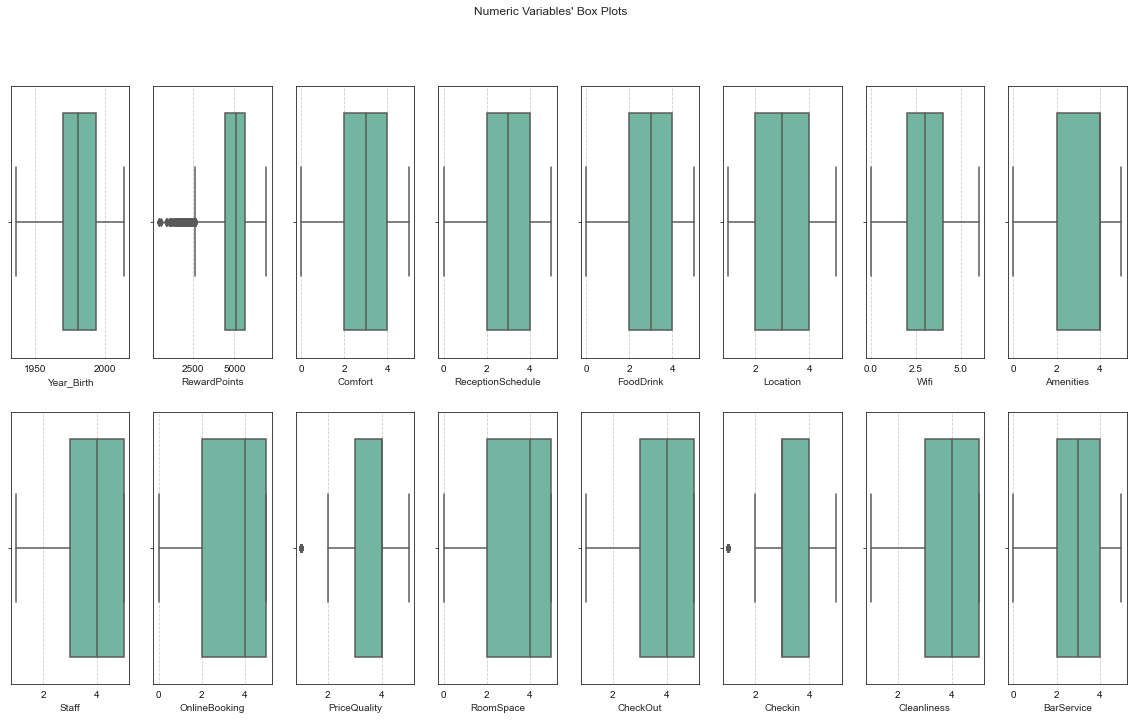

In [31]:
fig, axes = plt.subplots(2, math.ceil(len(metric_features) / 2), figsize=(20, 11))


for ax, feat in zip(axes.flatten(), metric_features): 
    sns.boxplot(x = train_copy[feat], ax=ax)
    
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

<hr>
<a class="anchor" id="Check">
    
# 7. Coherence Checking
    
</a>

In [32]:
train_copy.shape

(15586, 21)

In [33]:
train_copy['Wifi'].value_counts() #Has a 6 as well, scale is from 0-5

4.0    3703
5.0    3445
3.0    3347
2.0    3245
1.0    1792
6.0      36
0.0      18
Name: Wifi, dtype: int64

In [34]:
train_copy.Longevity.value_counts() #should only be yes/no

yes    12545
no      2874
y        167
Name: Longevity, dtype: int64

<hr>
<a class="anchor" id="TransformVar">
    
# 8. Transform Variables
    
</a>

__Transforming variables__

In [35]:
train_copy['Longevity'] = train_copy['Longevity'].replace('y','yes')
train_copy['Wifi'].clip(lower= 0, upper= 5, inplace= True)

In [36]:
# Age
train_copy['Age'] = date.today().year - train_copy.Year_Birth

In [37]:
train_copy['Age']

Cust_ID
1        48.0
2        57.0
3        49.0
4        29.0
5        33.0
         ... 
15585    34.0
15586    22.0
15587    58.0
15588    30.0
15589    39.0
Name: Age, Length: 15586, dtype: float64

In [38]:
# Create Reward Points groups? 

In [39]:
train_copy['Name'].str[:2].unique()

array(['Ms', 'Mr'], dtype=object)

In [40]:
train_copy['Name'].str[:2].unique()

array(['Ms', 'Mr'], dtype=object)

In [41]:
Check = train_copy['Name'].str.findall('Mr|Ms')
#Check.value_counts() -> all names with Ms are female

In [42]:
# Female - dummy (1 - female; 0 - male)
train_copy['Female'] = (train_copy['Name'].str.contains('Ms')).astype(int)

In [43]:
# More Women than men
train_copy['Female'].value_counts()

1    7982
0    7604
Name: Female, dtype: int64

In [44]:
#Churn value_counts
train_copy['Churn'].value_counts()

nochurn    8475
churn      7111
Name: Churn, dtype: int64

In [45]:
# Churn - dummy (0 - Nochurn; 1 - Churn)
#train_copy['Churn'] = (train_copy['Churn'].str.contains('churn')).astype(int)

train_copy.loc[train_copy['Churn']=='churn', 'Churn'] = 1
train_copy.loc[train_copy['Churn']=='nochurn', 'Churn'] = 0
train_copy['Churn'].astype(int)

Cust_ID
1        1
2        0
3        1
4        0
5        0
        ..
15585    1
15586    1
15587    0
15588    0
15589    1
Name: Churn, Length: 15586, dtype: int64

In [46]:
train_copy['Churn'].value_counts()

0    8475
1    7111
Name: Churn, dtype: int64

In [47]:
train_copy

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Age,Female
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,1,Ms. Nicole Clarke,yes,1974.0,business,single,4907.0,3.0,4.0,1.0,...,4.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,48.0,1
2,0,Mr. Jesse Scott,yes,1965.0,business,single,6724.0,1.0,1.0,1.0,...,4.0,5.0,5.0,5.0,5.0,1.0,5.0,2.0,57.0,0
3,1,Mr. Christopher Carter,yes,1973.0,business,single,4365.0,3.0,3.0,3.0,...,4.0,3.0,3.0,2.0,3.0,2.0,3.0,1.0,49.0,0
4,0,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849.0,1.0,1.0,1.0,...,5.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,29.0,1
5,0,Mr. Michael White,yes,1989.0,business,single,5376.0,2.0,2.0,3.0,...,5.0,5.0,5.0,3.0,4.0,1.0,3.0,5.0,33.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15585,1,Ms. Wendy Roberts,no,1988.0,business,double,4968.0,2.0,0.0,2.0,...,4.0,3.0,4.0,5.0,1.0,3.0,4.0,3.0,34.0,1
15586,1,Ms. Sonya Smith,no,2000.0,business,double,4970.0,3.0,3.0,3.0,...,5.0,5.0,3.0,1.0,3.0,4.0,4.0,5.0,22.0,1
15587,0,Mr. Maxwell Wright,yes,1964.0,business,single,4046.0,1.0,1.0,1.0,...,5.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,58.0,0


In [48]:
train_copy['Longevity'].value_counts()

yes    12712
no      2874
Name: Longevity, dtype: int64

__Dropping redundant variables__

In [49]:
train_copy.drop(columns=['Name','Year_Birth'],inplace = True)


In [50]:
train_copy

,Churn,Longevity,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,...,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Age,Female
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,1,yes,business,single,4907.0,3.0,4.0,1.0,4.0,4.0,...,4.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,48.0,1
2,0,yes,business,single,6724.0,1.0,1.0,1.0,1.0,5.0,...,4.0,5.0,5.0,5.0,5.0,1.0,5.0,2.0,57.0,0
3,1,yes,business,single,4365.0,3.0,3.0,3.0,3.0,1.0,...,4.0,3.0,3.0,2.0,3.0,2.0,3.0,1.0,49.0,0
4,0,yes,leisure,double,3849.0,1.0,1.0,1.0,1.0,4.0,...,5.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,29.0,1
5,0,yes,business,single,5376.0,2.0,2.0,3.0,2.0,5.0,...,5.0,5.0,5.0,3.0,4.0,1.0,3.0,5.0,33.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15585,1,no,business,double,4968.0,2.0,0.0,2.0,2.0,3.0,...,4.0,3.0,4.0,5.0,1.0,3.0,4.0,3.0,34.0,1
15586,1,no,business,double,4970.0,3.0,3.0,3.0,3.0,5.0,...,5.0,5.0,3.0,1.0,3.0,4.0,4.0,5.0,22.0,1
15587,0,yes,business,single,4046.0,1.0,1.0,1.0,1.0,3.0,...,5.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,58.0,0


In [51]:
train_copy = pd.get_dummies(train_copy, drop_first = True)

In [52]:
train_copy['Churn_1']

Cust_ID
1        1
2        0
3        1
4        0
5        0
        ..
15585    1
15586    1
15587    0
15588    0
15589    1
Name: Churn_1, Length: 15586, dtype: uint8

In [53]:
train_copy.rename(columns = {'Churn_1':'Churn'}, inplace = True)

train_copy = train_copy.reindex(columns=['Churn', 'RewardPoints', 'Comfort', 'ReceptionSchedule', 'FoodDrink',
       'Location', 'Wifi', 'Amenities', 'Staff', 'OnlineBooking',
       'PriceQuality', 'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness',
       'BarService', 'Age', 'Female', 'Longevity_yes', 'TypeTravel_leisure',
       'RoomType_single', 'RoomType_suite'])
train_copy

,Churn,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,...,CheckOut,Checkin,Cleanliness,BarService,Age,Female,Longevity_yes,TypeTravel_leisure,RoomType_single,RoomType_suite
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,1,4907.0,3.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,...,3.0,4.0,3.0,4.0,48.0,1,1,0,1,0
2,0,6724.0,1.0,1.0,1.0,1.0,5.0,3.0,4.0,5.0,...,5.0,1.0,5.0,2.0,57.0,0,1,0,1,0
3,1,4365.0,3.0,3.0,3.0,3.0,1.0,4.0,4.0,3.0,...,3.0,2.0,3.0,1.0,49.0,0,1,0,1,0
4,0,3849.0,1.0,1.0,1.0,1.0,4.0,4.0,5.0,4.0,...,4.0,4.0,4.0,3.0,29.0,1,1,1,0,0
5,0,5376.0,2.0,2.0,3.0,2.0,5.0,5.0,5.0,5.0,...,4.0,1.0,3.0,5.0,33.0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15585,1,4968.0,2.0,0.0,2.0,2.0,3.0,2.0,4.0,3.0,...,1.0,3.0,4.0,3.0,34.0,1,0,0,0,0
15586,1,4970.0,3.0,3.0,3.0,3.0,5.0,3.0,5.0,5.0,...,3.0,4.0,4.0,5.0,22.0,1,0,0,0,0
15587,0,4046.0,1.0,1.0,1.0,1.0,3.0,4.0,5.0,4.0,...,4.0,5.0,4.0,4.0,58.0,0,1,0,1,0


__Changing the data types__

In [54]:
train_copy = train_copy.astype('float32')
train_copy

,Churn,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,...,CheckOut,Checkin,Cleanliness,BarService,Age,Female,Longevity_yes,TypeTravel_leisure,RoomType_single,RoomType_suite
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,1.0,4907.0,3.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,...,3.0,4.0,3.0,4.0,48.0,1.0,1.0,0.0,1.0,0.0
2,0.0,6724.0,1.0,1.0,1.0,1.0,5.0,3.0,4.0,5.0,...,5.0,1.0,5.0,2.0,57.0,0.0,1.0,0.0,1.0,0.0
3,1.0,4365.0,3.0,3.0,3.0,3.0,1.0,4.0,4.0,3.0,...,3.0,2.0,3.0,1.0,49.0,0.0,1.0,0.0,1.0,0.0
4,0.0,3849.0,1.0,1.0,1.0,1.0,4.0,4.0,5.0,4.0,...,4.0,4.0,4.0,3.0,29.0,1.0,1.0,1.0,0.0,0.0
5,0.0,5376.0,2.0,2.0,3.0,2.0,5.0,5.0,5.0,5.0,...,4.0,1.0,3.0,5.0,33.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15585,1.0,4968.0,2.0,0.0,2.0,2.0,3.0,2.0,4.0,3.0,...,1.0,3.0,4.0,3.0,34.0,1.0,0.0,0.0,0.0,0.0
15586,1.0,4970.0,3.0,3.0,3.0,3.0,5.0,3.0,5.0,5.0,...,3.0,4.0,4.0,5.0,22.0,1.0,0.0,0.0,0.0,0.0
15587,0.0,4046.0,1.0,1.0,1.0,1.0,3.0,4.0,5.0,4.0,...,4.0,5.0,4.0,4.0,58.0,0.0,1.0,0.0,1.0,0.0


<hr>
<a class="anchor" id="CheckAge">
    
# 9. Coherence Checking - Age
    
</a>

In [55]:
print('Train:')
print('Min age:' + str(min(train_copy['Age'])))
print('Max age:' + str(max(train_copy['Age'])))
print('Mean: '+ str(train_copy['Age'].mean()))

Train:
Min age:8.0
Max age:86.0
Mean: 40.30183029174805


In [56]:
under_18_train = train_copy[train_copy['Age'] <= 18]

print('Percentage of underage in Train:',(len(under_18_train)/ len(train))*100)

Percentage of underage in Train: 7.622225073784166


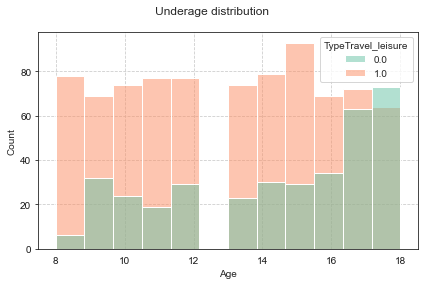

In [57]:
sns.histplot(data = under_18_train, x="Age",hue="TypeTravel_leisure")

ax.set_title('Train')


plt.suptitle('Underage distribution') #main title for the entire figure

plt.tight_layout() #to avoid overfitting

plt.show()

International age to work is 15 years old, so we will assume the rest of the clients under 15 will travel for leisure.

__Imputing these values__

We are assuming that the tenants under 16 just filled in their birth dates by mistake, as such, we will impute these with different variables, since the amount of records is too big to drop.
As we are assuming that they made a mistake at random, we will treat these values like they were missing at random. To fill in these values, we will use Multiple Imputation by Chained Equation.

In [58]:
features= ['RewardPoints', 'Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location',
       'Wifi', 'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality',
       'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness', 'BarService', 'Age',
       'Female', 'Longevity_yes', 'TypeTravel_leisure', 'RoomType_single',
       'RoomType_suite']

In [59]:
df_age_train= train_copy[features]

In [60]:
df_age_train

,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,...,CheckOut,Checkin,Cleanliness,BarService,Age,Female,Longevity_yes,TypeTravel_leisure,RoomType_single,RoomType_suite
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,4907.0,3.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,3.0,...,3.0,4.0,3.0,4.0,48.0,1.0,1.0,0.0,1.0,0.0
2,6724.0,1.0,1.0,1.0,1.0,5.0,3.0,4.0,5.0,5.0,...,5.0,1.0,5.0,2.0,57.0,0.0,1.0,0.0,1.0,0.0
3,4365.0,3.0,3.0,3.0,3.0,1.0,4.0,4.0,3.0,3.0,...,3.0,2.0,3.0,1.0,49.0,0.0,1.0,0.0,1.0,0.0
4,3849.0,1.0,1.0,1.0,1.0,4.0,4.0,5.0,4.0,4.0,...,4.0,4.0,4.0,3.0,29.0,1.0,1.0,1.0,0.0,0.0
5,5376.0,2.0,2.0,3.0,2.0,5.0,5.0,5.0,5.0,5.0,...,4.0,1.0,3.0,5.0,33.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15585,4968.0,2.0,0.0,2.0,2.0,3.0,2.0,4.0,3.0,4.0,...,1.0,3.0,4.0,3.0,34.0,1.0,0.0,0.0,0.0,0.0
15586,4970.0,3.0,3.0,3.0,3.0,5.0,3.0,5.0,5.0,3.0,...,3.0,4.0,4.0,5.0,22.0,1.0,0.0,0.0,0.0,0.0
15587,4046.0,1.0,1.0,1.0,1.0,3.0,4.0,5.0,4.0,4.0,...,4.0,5.0,4.0,4.0,58.0,0.0,1.0,0.0,1.0,0.0


In [61]:
df_age_train.loc[df_age_train['Age']< 16,['Age']] = train_copy['Age'].mean()

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [62]:
# lr = LinearRegression()
# imp = IterativeImputer(estimator=lr,missing_values=np.nan,max_iter = 500,imputation_order='roman'
#                        ,random_state=10).fit(df_age_train)
# dfage_fitted_train=imp.transform(df_age_train)

In [63]:
df_train_cleaned = pd.DataFrame(data=df_age_train, columns=df_age_train.columns, index=df_age_train.index)

In [64]:
train_copy[df_age_train.columns] = df_age_train

In [65]:
print('Minimum age after treatment-Train:',train_copy.Age.min(),'\n')

Minimum age after treatment-Train: 16.0 



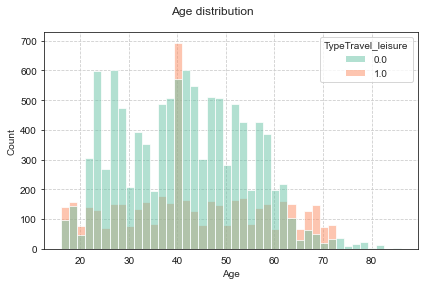

In [66]:
sns.histplot(data = train_copy, x="Age",hue="TypeTravel_leisure")

ax.set_title('Train')


plt.suptitle('Age distribution') #main title for the entire figure

plt.tight_layout() #to avoid overfitting

plt.show()

<hr>
<a class="anchor" id="outlier">
    
# 10. Outlier Removal
    
</a>

<a class="anchor" id="outdefeatures">

## 10.1. Outlier Removal - Defining Features

</a>

In [67]:
o_train_copy=train_copy.copy() #.drop(columns={'Name', 'Year_Birth'})
print(o_train_copy.columns)

Index(['Churn', 'RewardPoints', 'Comfort', 'ReceptionSchedule', 'FoodDrink',
       'Location', 'Wifi', 'Amenities', 'Staff', 'OnlineBooking',
       'PriceQuality', 'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness',
       'BarService', 'Age', 'Female', 'Longevity_yes', 'TypeTravel_leisure',
       'RoomType_single', 'RoomType_suite'],
      dtype='object')


In [68]:
outlier_metric_features = ['RewardPoints','Comfort',
       'ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi', 'Amenities',
       'Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace', 'CheckOut',
       'Checkin', 'Cleanliness', 'BarService']

In [69]:
outliers_features = ['RewardPoints','Checkin','PriceQuality']

As seen in the variable histograms/boxplots, these are the possible outliers: 

- Reward Points, 
- Checkin 
- PriceQuality

<a class="anchor" id="outfiltering">

## 10.2. Outlier Removal - Filtering

</a>

<hr>
<a class="anchor" id="manual">

### 10.3.1. Filters 1 - Manual
</a>

In [70]:
train_outliers = train_copy[outliers_features]

In [71]:
filter_Rp = (train_outliers['RewardPoints']<= 3000)
print('Percentage of RewardPoints whiskers:', np.round((filter_Rp[filter_Rp == True].count() / len(train_outliers), 4)))

Percentage of RewardPoints whiskers: [0. 4.]


In [72]:
outliers_features.remove('RewardPoints')

In [73]:
filter_Oths = (train_outliers[outliers_features]< 2)
print('Percentage of whiskers: \n', np.round(filter_Oths[filter_Oths == True].count() / len(train_outliers), 4))

Percentage of whiskers: 
 Checkin         0.1224
PriceQuality    0.1033
dtype: float64


<hr>
<a class="anchor" id="iqr">

### 10.3.2. Filters 2 - IQR
    
</a>

In [74]:
q25 = train_copy.quantile(.25)
q75 = train_copy.quantile(.75)
iqr = (q75 - q25)



upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr



filters2 = []
for metric in outlier_metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(train[metric].between(llim, ulim, inclusive=True))


filters2 = pd.Series(np.all(filters2, 0), index=train_copy.index)
df_2 = train[filters2]
print('Percentage of data kept after removing outliers:', np.round(df_2.shape[0] / train_copy.shape[0], 4))

Percentage of data kept after removing outliers: 0.7837


/var/folders/89/gv90tkm505qglgm9s_mrxwxw0000gn/T/ipykernel_14428/1620852763.py:16: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  filters2.append(train[metric].between(llim, ulim, inclusive=True))


<hr>
<a class="anchor" id="zscore">

### 10.3.2. Z-score
    
</a>

In [75]:
z_Rp = np.abs(stats.zscore(train_copy['RewardPoints'])) 
z_Rp[z_Rp > 3].count() #87 Outliers following Z-score
train[(z_Rp > 3)]
print('Percentage of RewardPoints outliers:', np.round((z_Rp[z_Rp > 3].count())/ len(train), 4))

Percentage of RewardPoints outliers: 0.0056


In [76]:
z_Ci = np.abs(stats.zscore(train_copy['Checkin'])) #No outliers
z_Ci[z_Ci>3]
print('Percentage of Checkin outliers:', np.round((z_Ci[z_Ci > 3].count())/ len(train), 4))

Percentage of Checkin outliers: 0.0


In [77]:
z_Pq = np.abs(stats.zscore(train_copy['PriceQuality'])) #No outliers
z_Pq[z_Pq > 3]
print('Percentage of PriceQuality outliers:', np.round((z_Pq[z_Pq > 3].count())/ len(train), 4))

Percentage of PriceQuality outliers: 0.0


In [78]:
train = train[(z_Rp < 3)]

<hr>
<a class="anchor" id="encoding">
    
# 12. Encoding - OneHotEncoder
    
</a>

https://www.ritchieng.com/machinelearning-one-hot-encoding/

In [79]:
le = preprocessing.LabelEncoder()

In [80]:
metric_features.remove('Year_Birth')

In [81]:
# One-Hot-Encoder for train
X_1 = train_copy[metric_features].apply(le.fit_transform)
enc = preprocessing.OneHotEncoder(sparse=False, drop="first")
enc_fit = enc.fit_transform(X_1)
enc_fnames = enc.get_feature_names()
#onehotlabels = enc.transform(X_2).toarray()
enc_df_train = pd.DataFrame(enc_fit, index=train_copy.index, columns=enc_fnames)

In [82]:
# One-Hot-Encoder for test
#X_2 = test_copy[metric_features].apply(le.fit_transform)
#enc_2 = preprocessing.OneHotEncoder(sparse=False, drop="first")
#enc_fit2 = enc_2.fit_transform(X_2)
#enc_fnames2 = enc_2.get_feature_names()
#onehotlabels = enc.transform(X_2).toarray()
#enc_df_test = pd.DataFrame(enc_fit2, index=test_copy.index, columns=enc_fnames2)

In [83]:
# Concatenate the encoded variables with the datasets

<hr>
<a class="anchor" id="standardization">
    
# 13. Standardization
    
</a>

<a class="anchor" id="standard">

## 13.1. Standard Scaler

</a>

In [84]:
metric_features = ['RewardPoints', 'Comfort', 'ReceptionSchedule', 'FoodDrink',
       'Location', 'Wifi', 'Amenities', 'Staff', 'OnlineBooking',
       'PriceQuality', 'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness',
       'BarService', 'Age', 'Female', 'Longevity_yes', 'TypeTravel_leisure',
       'RoomType_single', 'RoomType_suite']

In [85]:
scaler = StandardScaler().fit(train_copy[metric_features])
train_copy[metric_features] = scaler.transform(train_copy[metric_features])

In [86]:
#train_copy[train_copy.columns] = scaled_feat
train_copy.head(3)

,Churn,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,...,CheckOut,Checkin,Cleanliness,BarService,Age,Female,Longevity_yes,TypeTravel_leisure,RoomType_single,RoomType_suite
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,1.0,-0.112285,0.114273,0.660277,-1.283613,0.780501,0.572408,-0.277017,0.374143,-0.346615,...,-0.604580,0.530893,-0.599671,0.501852,0.458308,0.976035,0.475485,-0.670314,1.046102,-0.278918
2,0.0,1.655384,-1.326133,-1.314725,-1.283613,-1.528264,1.328215,-0.277017,0.374143,1.179685,...,1.121558,-1.837085,1.132761,-1.036220,1.122966,-1.024554,0.475485,-0.670314,1.046102,-0.278918
3,1.0,-0.639570,0.114273,0.001943,0.108281,0.010912,-1.695014,0.462423,0.374143,-0.346615,...,-0.604580,-1.047759,-0.599671,-1.805256,0.532158,-1.024554,0.475485,-0.670314,1.046102,-0.278918


In [87]:
train_copy.describe().round(2)

,Churn,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,...,CheckOut,Checkin,Cleanliness,BarService,Age,Female,Longevity_yes,TypeTravel_leisure,RoomType_single,RoomType_suite
count,15586.00,15586.00,15586.00,15586.00,15586.00,15586.00,15586.00,15586.00,15586.00,15586.00,...,15586.00,15586.00,15586.00,15586.00,15586.00,15586.00,15586.00,15586.00,15586.00,15586.00
mean,0.46,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00
std,0.50,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,0.00,-4.49,-2.05,-1.97,-1.98,-1.53,-2.45,-2.50,-1.90,-2.64,...,-2.33,-1.84,-2.33,-2.57,-1.90,-1.02,-2.10,-0.67,-0.96,-0.28
25%,0.00,-0.56,-0.61,-0.66,-0.59,-0.76,-0.94,-1.02,-0.38,-1.11,...,-0.60,-0.26,-0.60,-1.04,-0.80,-1.02,0.48,-0.67,-0.96,-0.28
50%,0.00,0.06,0.11,0.00,0.11,0.01,-0.18,0.46,0.37,0.42,...,0.26,-0.26,0.27,-0.27,-0.06,0.98,0.48,-0.67,-0.96,-0.28
75%,1.00,0.61,0.83,0.66,0.80,0.78,0.57,0.46,1.13,1.18,...,1.12,0.53,1.13,0.50,0.75,0.98,0.48,1.49,1.05,-0.28
max,1.00,1.88,1.55,1.32,1.50,1.55,1.33,1.20,1.13,1.18,...,1.12,1.32,1.13,1.27,3.26,0.98,0.48,1.49,1.05,3.59


<a class="anchor" id="minmax">

## 13.2. MinMax Scaler

</a>

In [88]:
#metric_features.remove('Year_Birth')

In [89]:
scaler2 = MinMaxScaler()
train_minmax = train_copy.copy()
train_minmax[metric_features] = scaler2.fit_transform(train_minmax[metric_features])
train_minmax.head()

,Churn,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,...,CheckOut,Checkin,Cleanliness,BarService,Age,Female,Longevity_yes,TypeTravel_leisure,RoomType_single,RoomType_suite
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.687662,0.6,0.8,0.2,0.75,0.8,0.6,0.75,0.6,...,0.50,0.75,0.50,0.8,0.457143,1.0,1.0,0.0,1.0,0.0
2,0.0,0.965449,0.2,0.2,0.2,0.00,1.0,0.6,0.75,1.0,...,1.00,0.00,1.00,0.4,0.585714,0.0,1.0,0.0,1.0,0.0
3,1.0,0.604800,0.6,0.6,0.6,0.50,0.2,0.8,0.75,0.6,...,0.50,0.25,0.50,0.2,0.471429,0.0,1.0,0.0,1.0,0.0
4,0.0,0.525913,0.2,0.2,0.2,0.00,0.8,0.8,1.00,0.8,...,0.75,0.75,0.75,0.6,0.185714,1.0,1.0,1.0,0.0,0.0
5,0.0,0.759364,0.4,0.4,0.6,0.25,1.0,1.0,1.00,1.0,...,0.75,0.00,0.50,1.0,0.242857,0.0,1.0,0.0,1.0,0.0


In [90]:
# train[metric_features].describe().round(2)

<hr>
<a class="anchor" id="inputtarget">
    
# 14. Input Variables and Target Split
    
</a>

In [91]:
X = train_copy.loc[:, train_copy.columns != 'Churn']

In [92]:
y = train_copy['Churn']

In [93]:
#X = train_data[metric_features]

<hr>
<a class="anchor" id="featureselection">
    
# 15. Feature Selection
    
</a>

https://machinelearningmastery.com/calculate-feature-importance-with-python/

<a class="anchor" id="corr">

## 15.1. Correlation's: Pearson and Spearman

</a>

__Pearson__

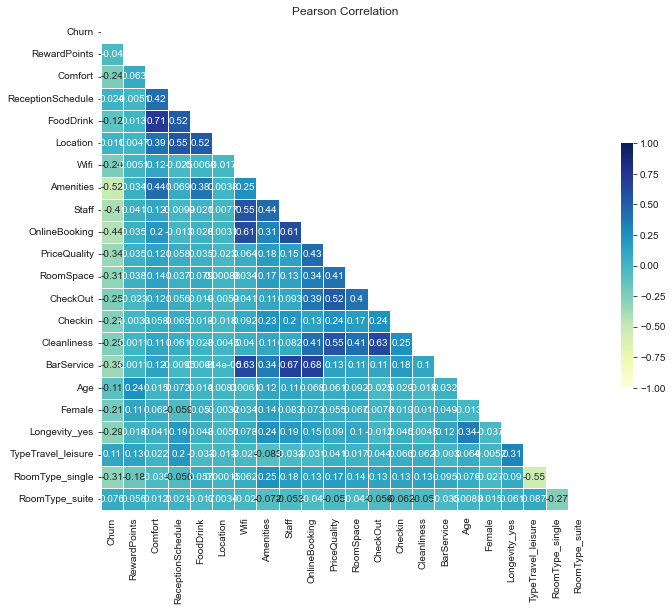

In [94]:
# Compute the correlation matrix - Pearson
corr = train_copy.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask,cmap = 'YlGnBu', vmax = 1, vmin=-1, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})
pyplot.title('Pearson Correlation')
pyplot.show()

__Spearman__

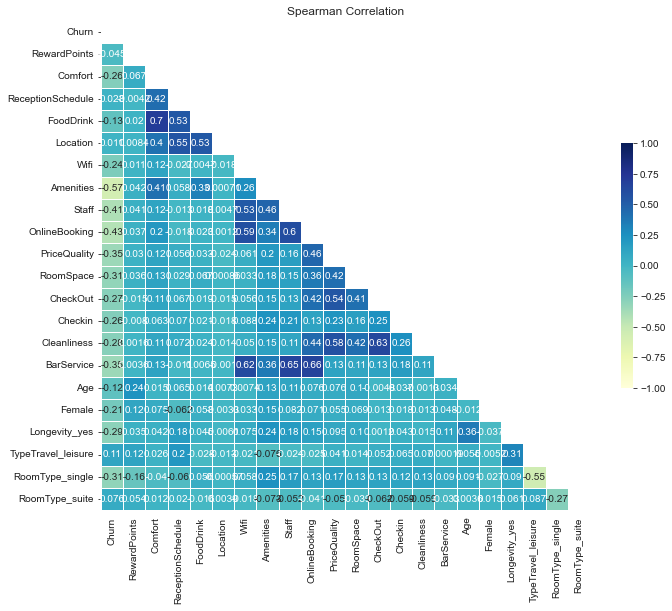

In [95]:
# Compute the correlation matrix - Spearman
corr = train_copy.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask,cmap = 'YlGnBu', vmax = 1, vmin=-1, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})
pyplot.title('Spearman Correlation')
pyplot.show()

In [96]:
corr_pairs = corr.unstack().sort_values(kind="quicksort")
abs(corr_pairs)[abs(corr_pairs).between(.65,.9999)]

Staff          BarService       0.653732
BarService     Staff            0.653732
OnlineBooking  BarService       0.662496
BarService     OnlineBooking    0.662496
FoodDrink      Comfort          0.701433
Comfort        FoodDrink        0.701433
dtype: float64

In [97]:
#Correlation with target
#train_data[metric_features].corrwith(train_copy.Churn).plot.bar(figsize = (15, 10), title = "Correlation with Target", fontsize = 10,grid = True)


<a class="anchor" id="rfe">

## 15.2. Recursive Feature Elimination - RFE

</a>

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8 <br>
https://machinelearningmastery.com/rfe-feature-selection-in-python/

In [98]:
# Exploring the Base Algorithm wrapped in RFE

In [99]:
def get_models():
    models = dict()
    # logistic regression - changing the max_iteraction since the default is 100, and not enough
    rfe = RFE(estimator=LogisticRegression(max_iter = 500), n_features_to_select=10)
    model = DecisionTreeClassifier()
    models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
    # perceptron
    rfe = RFE(estimator=Perceptron(), n_features_to_select=10)
    model = DecisionTreeClassifier()
    models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
    # cart
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)
    model = DecisionTreeClassifier()
    models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
    # rf
    rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=10)
    model = DecisionTreeClassifier()
    models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
    # gbm
#    rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=10)
#    model = DecisionTreeClassifier()
#    models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=12, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [100]:
models = get_models()

In [101]:
#evaluate the models and store results --> Takes some time to run
#results, names = list(), list()
#for name, model in models.items():
    #scores = evaluate_model(model, X, y)
    #results.append(scores)
    #names.append(name)
    #print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

    >lr 0.909 (0.008)
    >per 0.868 (0.031)
    >cart 0.887 (0.009)
    >rf 0.875 (0.010)
    >gbm 0.907 (0.010)

In [102]:
# plot model performance for comparison
#pyplot.boxplot(results, labels=names, showmeans=True)
#pyplot.title('Evaluating each Model')
#pyplot.show()

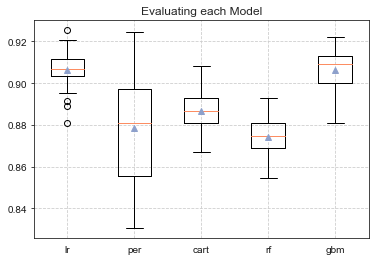

We can see the general trend of good performance with logistic regression,GBM and perhaps CART. Even thought the actual model used to fit the chosen features is the same in each case, the model used within RFE can make an important difference to which features are selected and in turn the performance on the prediction problem.
<br>
We will choose Logistic Regression as it is the one with best performance along with gbm, but it is considerably faster than gbm. 

In [103]:
def rfe_model():
    models = dict()
    for i in range(2, 15):
        rfe = RFE(estimator=LogisticRegression(max_iter = 500), n_features_to_select=i)
        model = LogisticRegression(max_iter = 500)
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

In [104]:
#models = rfe_model()

#results, names = list(), list()
#for name, model in models.items():
    #scores = evaluate_model(model, X, y)
    #results.append(scores)
    #names.append(name)
    #print('>%s %.2f (%.2f)' % (name, mean(scores), std(scores)))

    >2 0.78 (0.01)
    >3 0.80 (0.01)
    >4 0.80 (0.01)
    >5 0.80 (0.01)
    >6 0.81 (0.01)
    >7 0.82 (0.01)
    >8 0.82 (0.01)
    >9 0.83 (0.01)
    >10 0.83 (0.01)
    >11 0.83 (0.01)
    >12 0.83 (0.01)
    >13 0.83 (0.01)
    >14 0.83 (0.01)

In [105]:
# plot model performance for comparison
#pyplot.boxplot(results, labels=names, showmeans=True)
#pyplot.title('Distribution of accuracy scores for each configured number of features')
#pyplot.show()

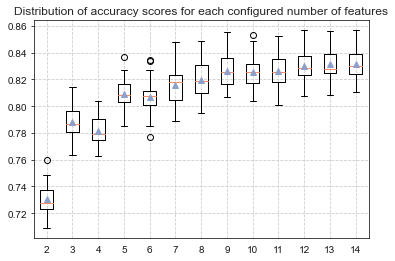

In [106]:
from sklearn.feature_selection import RFECV

In [107]:
#model = RFECV(estimator=RandomForestClassifier(), min_features_to_select=9,cv = 5).fit(X = X, y = y) 
#rfe_df = pd.DataFrame(zip(X.columns,model.ranking_), columns = ['col','rf'])

In [108]:
#model_lr = RFECV(estimator=LogisticRegression(), min_features_to_select=9,cv = 5).fit(X = X, y = y) 
#rfe_df['lr'] = model_lr.ranking_

In [109]:
#model_svM = RFECV(estimator=SVC(kernel="linear", C=1), min_features_to_select=9,cv = 5).fit(X = X, y = y) 
#rfe_df['svc'] = model_svM.ranking_

In [110]:
#model_dt = RFECV(estimator=DecisionTreeClassifier(), min_features_to_select=9,cv = 5).fit(X = X, y = y) 
#rfe_df['dt'] = model_dt.ranking_

[BACK TO TOC](#toc)

<a class="anchor" id="lasso">

## 15.3. LASSO Regression

</a>

https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/
https://machinelearninghd.com/lasso-regression-in-python/#:~:text=Lasso%20regression%20stands%20for%20Least,or%20in%20general%20is%20shrinkage.

In [111]:
#Class with the important information with Lasso 
class model_Lasso:                
 
    def __init__(self, data=X,target=y): 
        self.data = X   
        self.target = y
        
        lasso = LassoCV(cv=5)
        lasso.fit(X=self.data, y=self.target)
        
        self.coef = pd.Series(lasso.coef_, index = self.data.columns).sort_values()
        self.df = pd.DataFrame(zip(X.columns,lasso.coef_), columns = ['col','lasso']).sort_values(by = 'lasso')
        self.picked_vars = sum(self.coef != 0)
        self.eliminated_vars = sum(self.coef == 0)
        
    def plotting(self):
        plt.figure(figsize=(6,10))
        sns.barplot(data = self.df, x="lasso",y ='col')
        plt.title("Feature importance -  Lasso Model")
        plt.show()

In [112]:
#Lasso = model_Lasso()
#Lasso.plotting()

In [113]:
#lasso = Lasso.df.sort_values(by= 'lasso', ascending=False).reset_index().drop(columns = ['index'])
#lasso

<a class="anchor" id="ridge">

## 15.4. RIDGE Regression

</a>

https://analyticsindiamag.com/a-hands-on-guide-to-ridge-regression-for-feature-selection/

In [114]:
from sklearn.linear_model import RidgeCV

In [115]:
#Class with the important information with RidgeCV 
class model_Ridge:                
 
    def __init__(self, data=X,target=y): 
        self.data = X   
        self.target = y
        
        ridge = RidgeCV(cv = 5)
        ridge.fit(X=self.data, y=self.target)
        
        self.coef = pd.Series(ridge.coef_, index = self.data.columns).sort_values()
        self.df = pd.DataFrame(zip(X.columns,ridge.coef_), columns = ['col','ridge']).sort_values(by = 'ridge')
        self.picked_vars = sum(self.coef > 0)
        self.eliminated_vars = sum(self.coef <=0)
        
    def plotting(self):
        plt.figure(figsize=(6,10))
        sns.barplot(data = self.df, x="ridge",y ='col')
        plt.title("Feature importance -  Ridge Model")
        plt.show()

In [116]:
#Ridge = model_Ridge()

In [117]:
#Ridge.plotting()

In [118]:
#ridge = Ridge.df.sort_values(by= 'ridge', ascending=False).reset_index().drop(columns = ['index'])
#ridge

<a class="anchor" id="chisquare">

## 15.5. Chi-Square

</a>

https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223#:~:text=In%20feature%20selection%2C%20we%20aim,hypothesis%20of%20independence%20is%20incorrect.

In [119]:
Y_chi = train_minmax['Churn']
X_chi = train_minmax.loc[:, train_minmax.columns != 'Churn']

In [120]:
chi_scores = chi2(X_chi,Y_chi)
chi_scoresd

(array([8.62422124e-01, 1.21994314e+02, 1.41154099e+00, 3.17140645e+01,
        4.07172059e-01, 9.78304262e+01, 4.52592630e+02, 4.31583620e+02,
        2.94234170e+02, 2.98552437e+02, 1.45472041e+02, 1.16856584e+02,
        1.91014116e+02, 1.21236853e+02, 1.93370137e+02, 1.75420996e+01,
        3.32744056e+02, 2.42084870e+02, 1.33762947e+02, 7.67476453e+02,
        8.35751838e+01]),
 array([3.53061764e-001, 2.31500366e-028, 2.34800749e-001, 1.78623935e-008,
        5.23408357e-001, 4.55790016e-023, 1.96739303e-100, 7.34877196e-096,
        5.94280626e-066, 6.81003268e-067, 1.69341026e-033, 3.08594756e-027,
        1.90974108e-043, 3.39127800e-028, 5.84434614e-044, 2.81015959e-005,
        2.42736794e-074, 1.38076199e-054, 6.15643332e-031, 6.35988502e-169,
        6.13382457e-020]))

In [121]:
#p_values = pd.Series(chi_scores[1],index = X.columns)
p_values = pd.DataFrame(zip(X.columns,chi_scores[1] ), columns = ['col','chi-score'])
p_values.sort_values(by = 'chi-score',ascending = False , inplace = True)

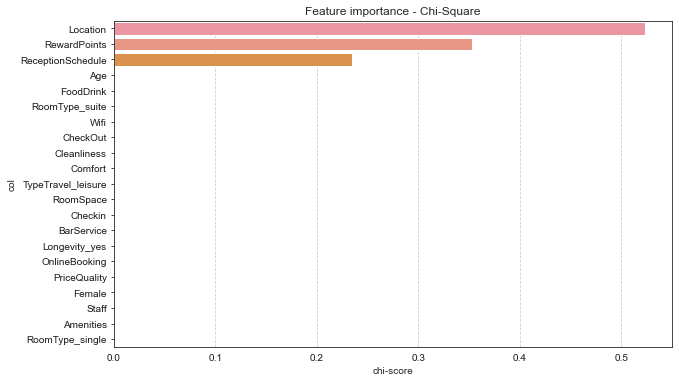

In [122]:
plt.figure(figsize=(10,6))
sns.barplot(data = p_values, x="chi-score",y ='col')
plt.title("Feature importance - Chi-Square")
plt.show()

In [123]:
p_values['chi-score'] = p_values['chi-score'].rank(ascending = True)
p_values

,col,chi-score
4,Location,21.0
0,RewardPoints,20.0
2,ReceptionSchedule,19.0
15,Age,18.0
3,FoodDrink,17.0
20,RoomType_suite,16.0
5,Wifi,15.0
11,CheckOut,14.0
13,Cleanliness,13.0
1,Comfort,12.0


<a class="anchor" id="anova">

## 15.7. ANOVA F-Values

</a>

https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different. Then, the algorithm selects features according to the k highest scores.

In [124]:
# define feature selection
fs = SelectKBest(score_func=f_classif, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, y)

# Results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_selected.shape[1])

Original number of features: 21
Reduced number of features: 10


In [125]:
anova = pd.DataFrame(zip(X.columns,fs.scores_), columns = ['col','anova']).sort_values(by = 'anova', ascending = False).reset_index().drop(columns = ['index'])
anova

,col,anova
0,Amenities,5702.915039
1,OnlineBooking,3652.946045
2,Staff,2955.576416
3,BarService,2181.803711
4,PriceQuality,2068.562500
5,RoomSpace,1669.700806
6,RoomType_single,1621.543945
7,Longevity_yes,1433.348022
8,Checkin,1192.498169
9,Cleanliness,1045.230347


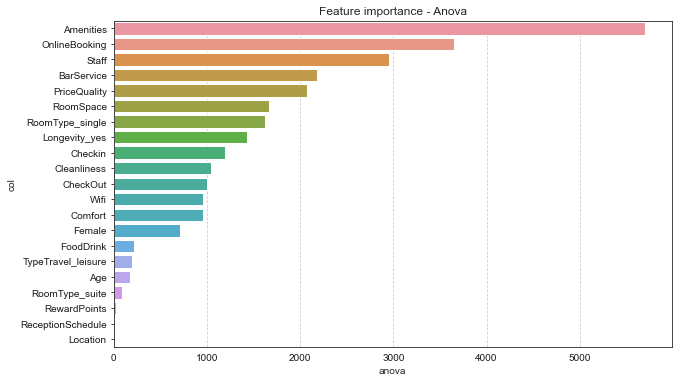

In [126]:
plt.figure(figsize=(10,6))
sns.barplot(data = anova, x="anova",y ='col')
plt.title("Feature importance - Anova")
plt.show()

<a class="anchor" id="ginientropy">

## 15.9. Gini Importance | Entropy Importance

</a>

In [127]:
gini_importance = DecisionTreeClassifier().fit(X, y).feature_importances_

In [128]:
#g_imp = pd.Series(gini_importance , index = X.columns).sort_values()
g_imp = pd.DataFrame(zip(X.columns,gini_importance ), columns = ['col','gini']).sort_values(by='gini',ascending = False)

In [129]:
#plt.figure(figsize=(6,10))
#g_imp.plot(kind = "barh")
#plt.title("Feature importance - Gini Importance")
#plt.show()

In [130]:
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(X, y).feature_importances_

In [131]:
e_imp = pd.DataFrame(zip(X.columns,entropy_importance ), columns = ['col','entropy']).sort_values(by='entropy',ascending = False)

In [132]:
#plt.figure(figsize=(6,10))
#e_imp.plot(kind = "barh")
#plt.title("Feature importance - Entropy Importance")
#plt.show()

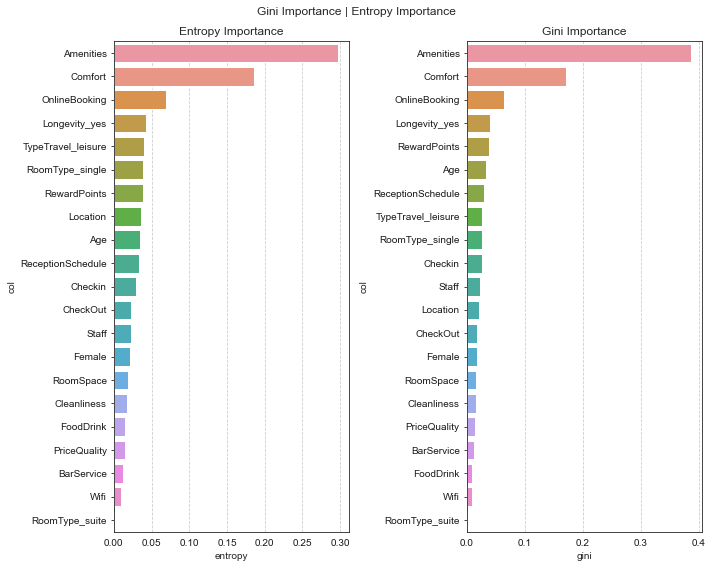

In [133]:
fig,ax = plt.subplots(nrows = 1,ncols = 2, figsize = (10,8))

sns.barplot(data = e_imp, x="entropy",y ='col',ax=ax[0])
sns.barplot(data = g_imp, x="gini",y= 'col',ax=ax[1])

ax[0].set_title('Entropy Importance')
ax[1].set_title('Gini Importance')

plt.suptitle('Gini Importance | Entropy Importance') #main title for the entire figure

plt.tight_layout() #to avoid overfitting

plt.show()

In [134]:
gini_entropy = e_imp.merge(g_imp, on= 'col')
gini_entropy

,col,entropy,gini
0,Amenities,0.296798,0.385910
1,Comfort,0.186201,0.170743
2,OnlineBooking,0.068770,0.064358
3,Longevity_yes,0.042646,0.040605
4,TypeTravel_leisure,0.040001,0.026765
5,RoomType_single,0.038970,0.026559
6,RewardPoints,0.038906,0.038908
7,Location,0.036260,0.021364
8,Age,0.034857,0.032750
9,ReceptionSchedule,0.033115,0.029776


<a class="anchor" id="adaboost">

## 15.11. AdaBoost Feature Importances

</a>

In [135]:
from sklearn.ensemble import AdaBoostClassifier

In [136]:
adaboost = AdaBoostClassifier(random_state = 4).fit(X, y)

In [137]:
adaboost_imp = adaboost.feature_importances_

In [138]:
adaboost = pd.DataFrame(zip(X.columns,adaboost_imp), columns = ['col','adaboost']).sort_values(by='adaboost', ascending = False)

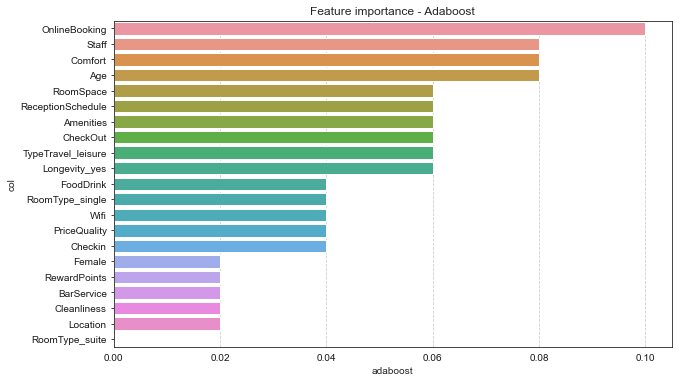

In [139]:
plt.figure(figsize=(10,6))
sns.barplot(data = adaboost, x="adaboost",y ='col')
plt.title("Feature importance - Adaboost")
plt.show()

In [140]:
#adaboost['rank'] = adaboost['adaboost'].rank(ascending = False)

<hr>
<a class="anchor" id="selectedfeatures">
    
# 15.12 Final Selected Features with StratifiedKFold
    
</a>

In [141]:
cat_vars = ['Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location',
       'Wifi', 'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality',
       'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness', 'BarService', 
       'Female', 'Longevity_yes', 'TypeTravel_leisure', 'RoomType_single',
       'RoomType_suite']
num_vars = ['RewardPoints','Age']

from sklearn.model_selection import StratifiedKFold

def select_best_features(X, y):
    skf = StratifiedKFold(n_splits = 3)
    counter = 0
    for train_index, val_index in skf.split(X, y):
        counter +=1
        print('')
        print('--------------------------------------------------------')
        print('SPLIT ', counter)
        print('--------------------------------------------------------')
        print('')
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        
        # fill missing values (median in numerical data, mode in categorical data)
#        median_age_train = X_train['Age'].median()
#        X_train['Age'].fillna(median_age_train, inplace = True)
#        X_val['Age'].fillna(median_age_train, inplace = True)
#        mode_sex_train = X_train['Female'].mode()[0]
#        X_train['Female'].fillna(mode_sex_train, inplace = True)
#        X_val['Female'].fillna(mode_sex_train, inplace = True)
        
        # get all numerical variables
        X_train_num = X_train[num_vars]
        X_val_num = X_val[num_vars]
        
        # get all categorical variables
        X_train_cat = X_train[cat_vars]
        X_val_cat = X_val[cat_vars]
        
        # Apply scaling to numerical data
        scaler = MinMaxScaler().fit(X_train_num)
        X_train_scaled = pd.DataFrame(scaler.transform(X_train_num), columns = X_train_num.columns, index = X_train_num.index,) # MinMaxScaler in the training data
    
        # Check which features to use using RFE
        print('')
        print('----------------- RFE log----------------------')
        model = LogisticRegression()
        rfe = RFE(estimator = model, n_features_to_select = 9) #make a for loop from 2-10
        X_rfe = rfe.fit_transform(X = X_train_scaled, y = y_train)
        selected_features = pd.Series(rfe.support_, index = X_train_scaled.columns)
        print(selected_features)
        
        # Check which features to use using RFE
        print('')
        print('----------------- RFE rf----------------------')
        model = RandomForestClassifier()
        rfe = RFE(estimator = model, n_features_to_select = 9) 
        X_rfe = rfe.fit_transform(X = X_train_scaled, y = y_train)
        selected_features = pd.Series(rfe.support_, index = X_train_scaled.columns)
        print(selected_features)
        
                # Check which features to use using RFE
        print('')
        print('----------------- RFE df----------------------')
        model = DecisionTreeClassifier()
        rfe = RFE(estimator = model, n_features_to_select = 9) 
        X_rfe = rfe.fit_transform(X = X_train_scaled, y = y_train)
        selected_features = pd.Series(rfe.support_, index = X_train_scaled.columns)
        print(selected_features)
        
        # Check which features to use using Chi-Square
        print('')
        print('----------------- CHI-SQUARE ----------------------')
        def TestIndependence(X,y,var,alpha=0.05):        
            dfObserved = pd.crosstab(y,X) 
            chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
            dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
            if p<alpha:
                result="{0} is IMPORTANT for Prediction".format(var)
            else:
                result="{0} is NOT important for Prediction. (Discard {0} from model)".format(var)
            print(result)
        
        for var in X_train_cat:
            TestIndependence(X_train_cat[var],y_train, var)
                    
        # Check which features to use using RidgeCV
        print('')
        print('----------------- RidgeCV ----------------------')
        reg = RidgeCV()
        reg.fit(X=X_train_scaled, y=y_train.replace('nochurn',0).replace('churn',1))
        print("Alpha with RidgeCV: %f" % reg.alpha_)
        print("Alpha with RidgeCV: %f" %reg.score(X = X_train_scaled,y = y_train.replace('nochurn',0).replace('churn',1)))
        coef = pd.Series(reg.coef_, index = X_train_scaled.columns)
        print(coef)      
        
        # Check which features to use using RidgeCV
        print('')
        print('----------------- LassoCV ----------------------')
        reg = LassoCV()
        reg.fit(X=X_train_scaled, y=y_train.replace('nochurn',0).replace('churn',1))
        print("Alpha with RidgeCV: %f" % reg.alpha_)
        print("Alpha with RidgeCV: %f" %reg.score(X = X_train_scaled,y = y_train.replace('nochurn',0).replace('churn',1)))
        coef = pd.Series(reg.coef_, index = X_train_scaled.columns)
        print(coef)           
        
from sklearn.linear_model import RidgeCV
select_best_features(X, y)


--------------------------------------------------------
SPLIT  1
--------------------------------------------------------


----------------- RFE log----------------------
RewardPoints    True
Age             True
dtype: bool

----------------- RFE rf----------------------
RewardPoints    True
Age             True
dtype: bool

----------------- RFE df----------------------
RewardPoints    True
Age             True
dtype: bool

----------------- CHI-SQUARE ----------------------
Comfort is IMPORTANT for Prediction
ReceptionSchedule is NOT important for Prediction. (Discard ReceptionSchedule from model)
FoodDrink is IMPORTANT for Prediction
Location is IMPORTANT for Prediction
Wifi is IMPORTANT for Prediction
Amenities is IMPORTANT for Prediction
Staff is IMPORTANT for Prediction
OnlineBooking is IMPORTANT for Prediction
PriceQuality is IMPORTANT for Prediction
RoomSpace is IMPORTANT for Prediction
CheckOut is IMPORTANT for Prediction
Checkin is IMPORTANT for Prediction
Cleanliness is 

<hr>
<a class="anchor" id="selectedfeatures">
    
# 16. Final Selected Features
    
</a>

In [142]:
#lasso['lasso'] = lasso['lasso'].rank(ascending = False)
#ridge['ridge'] = ridge['ridge'].rank(ascending = False)
#adaboost['adaboost'] = adaboost['adaboost'].rank(ascending = False)
#p_values['chi-score'] = p_values['chi-score'].rank(ascending = False)
#anova['anova'] = anova['anova'].rank(ascending = False)
#gini_entropy['gini'] = gini_entropy['gini'].rank(ascending = False)
#gini_entropy['entropy'] = gini_entropy['entropy'].rank(ascending = False)
#rfe_df['rfe'] = rfe_df['rfe'].rank(ascending = False)

#friedman['friedman'] = friedman['friedman'].rank(ascending = False)
#mse['mse'] = mse['mse'].rank(ascending = False)
#mae['mae'] = mae['mae'].rank(ascending = False)

In [143]:
#feature_selection = [rfe_df, ridge, adaboost, p_values, anova, gini_entropy, lasso] #friedman,mse,mae]

In [144]:
#features = reduce(lambda  left,right: pd.merge(left,right,on=['col'],how='outer'), feature_selection)

In [145]:
#features['total']= features.select_dtypes('number').sum(axis = 1)

In [146]:
#features.sort_values(by = 'total', ascending = True).head(10)['col']

In [147]:
#new_features = features.sort_values(by = 'total', ascending = True).head(10)['col']

In [148]:
new_features1 = ['OnlineBooking', 'TypeTravel_leisure','Amenities','Staff','Age','RoomType_single','ReceptionSchedule',
               'Comfort','Longevity_yes','CheckOut']

In [149]:
#new_features2 = X.columns[X.columns != 'ReceptionSchedule']

<a class="anchor" id="xy">

## 16.1. Split into X (Input variables) and y (Target)

</a>

In [150]:
X2 = X[X.columns[X.columns != 'Wifi']]
y2 = y

In [151]:
# Assigning data and target to X and y, respectively
X = X[new_features1]
y = y

<hr>
<a class="anchor" id="traintestsplit">
    
# 17. Train Test Split
    
</a>

In [152]:
# TRAIN (70%) & VALIDATION (30%) SPLIT
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)

In [153]:
y_train.value_counts()

0.0    5932
1.0    4978
Name: Churn, dtype: int64

<hr>
<a class="anchor" id="models">
    
# 18. Models
    
</a>

<a class="anchor" id="kfoldrkfold">

## 18.1. K-Fold and Repeated K-Fold parameters

</a>

https://neptune.ai/blog/cross-validation-in-machine-learning-how-to-do-it-right

In [154]:
kf = KFold(n_splits=10) #Usually, k is 5 or 10 but you can choose any number which is less than the dataset’s length.

In [155]:
rkf = RepeatedKFold(n_splits=10, n_repeats=2) 

A good default for the number of repeats depends on how noisy the estimate of model performance is on the dataset. A value of 3, 5, or 10 repeats is probably a good start. More repeats than 10 are probably not required. <br>
https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/#:~:text=A%20good%20default%20for%20k,10%20are%20probably%20not%20required.

In [156]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [ 1559  1560  1561 ... 15583 15584 15585] TEST: [   0    1    2 ... 1556 1557 1558]
TRAIN: [    0     1     2 ... 15583 15584 15585] TEST: [1559 1560 1561 ... 3115 3116 3117]
TRAIN: [    0     1     2 ... 15583 15584 15585] TEST: [3118 3119 3120 ... 4674 4675 4676]
TRAIN: [    0     1     2 ... 15583 15584 15585] TEST: [4677 4678 4679 ... 6233 6234 6235]
TRAIN: [    0     1     2 ... 15583 15584 15585] TEST: [6236 6237 6238 ... 7792 7793 7794]
TRAIN: [    0     1     2 ... 15583 15584 15585] TEST: [7795 7796 7797 ... 9351 9352 9353]
TRAIN: [    0     1     2 ... 15583 15584 15585] TEST: [ 9354  9355  9356 ... 10909 10910 10911]
TRAIN: [    0     1     2 ... 15583 15584 15585] TEST: [10912 10913 10914 ... 12467 12468 12469]
TRAIN: [    0     1     2 ... 15583 15584 15585] TEST: [12470 12471 12472 ... 14025 14026 14027]
TRAIN: [    0     1     2 ... 14025 14026 14027] TEST: [14028 14029 14030 ... 15583 15584 15585]


In [157]:
for train_index, test_index in rkf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [    0     1     2 ... 15583 15584 15585] TEST: [   11    25    28 ... 15562 15565 15573]
TRAIN: [    0     1     2 ... 15583 15584 15585] TEST: [    5    10    15 ... 15566 15567 15570]
TRAIN: [    0     1     2 ... 15583 15584 15585] TEST: [    8    12    13 ... 15569 15575 15578]
TRAIN: [    0     1     2 ... 15583 15584 15585] TEST: [   30    31    32 ... 15554 15558 15576]
TRAIN: [    0     1     3 ... 15582 15583 15584] TEST: [    2    20    44 ... 15568 15574 15585]
TRAIN: [    0     2     3 ... 15582 15583 15585] TEST: [    1    35    37 ... 15557 15571 15584]
TRAIN: [    1     2     3 ... 15583 15584 15585] TEST: [    0    19    23 ... 15556 15564 15572]
TRAIN: [    0     1     2 ... 15582 15584 15585] TEST: [    3    22    58 ... 15553 15581 15583]
TRAIN: [    0     1     2 ... 15583 15584 15585] TEST: [    4     6     9 ... 15577 15579 15582]
TRAIN: [    0     1     2 ... 15583 15584 15585] TEST: [    7    14    24 ... 15548 15559 15580]
TRAIN: [    0     1     2 ... 

In [158]:
def avg_score(method,model):
    # apply kfold
    kf = method
    # create lists to store the results from the different models 
    score_train = []
    score_test = []
    timer = []
    for train_index, test_index in kf.split(X):
        # get the indexes of the observations assigned for each partition
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # start counting time
        begin = time.perf_counter()
        # fit the model to the data
        model.fit(X_train, y_train)
        # finish counting time
        end = time.perf_counter()
        # check the mean accuracy for the train
        value_train = model.score(X_train, y_train)
        # check the mean accuracy for the test
        value_test = model.score(X_test,y_test)
        # append the accuracies, the time and the number of iterations in the corresponding list
        score_train.append(value_train)
        score_test.append(value_test)
        timer.append(end-begin)
    # calculate the average and the std for each measure (accuracy, time and number of iterations)
    avg_time = round(np.mean(timer),3)
    avg_train = round(np.mean(score_train),3)
    avg_test = round(np.mean(score_test),3)
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),2)
    std_test = round(np.std(score_test),2)
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
str(avg_test) + '+/-' + str(std_test)

<a class="anchor" id="nn">

## 18.2. Multi-Layer Perceptron

</a>

<hr>
<a class="anchor" id="gridsearchnn">

### 18.2.1. Grid Search NN
    
</a>

In [159]:
def mlp_avg_score(method, model):
    # apply kfold
    kf = method #K-folds: takes our entire dataset and divides it 10 times
    # create lists to store the results from the different models 
    score_train = []
    score_val = []
    timer = []
    n_iter = []
    for train_index, val_index in kf.split(X):
        # get the indexes of the observations assigned for each partition
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        # start counting time
        begin = time.perf_counter()
        # fit the model to the data
        model.fit(X_train, y_train)
        # finish counting time
        end = time.perf_counter()
        # check the mean accuracy for the train
        value_train = model.score(X_train, y_train) #we are checking both scores, value_train and value_val to make sure that it doesn't overfit 
        # check the mean accuracy for the validation #we don't want our model to be very good in the train data, but not in test
        value_val = model.score(X_val, y_val)
        # append the accuracies, the time and the number of iterations in the corresponding list
        score_train.append(value_train)
        score_val.append(value_val)
        timer.append(end-begin)
        n_iter.append(model.n_iter_)
    # calculate the average and the std for each measure (accuracy, time and number of iterations)
    avg_time = round(np.mean(timer),3)
    avg_train = round(np.mean(score_train),3)
    avg_val = round(np.mean(score_val),3)
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),2)
    std_val = round(np.std(score_val),2)
    avg_iter = round(np.mean(n_iter),1)
    std_iter = round(np.std(n_iter),1)
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
str(avg_val) + '+/-' + str(std_val), str(avg_iter) + '+/-' + str(std_iter)

In [160]:
def show_results(df, *args):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # for each model passed as argument
    for arg in args:
        # obtain the results provided by avg_score
        time, avg_train, avg_test = avg_score(arg)
        # store the results in the right row
        df.iloc[count] = time, avg_train, avg_test
        count+=1
    return df

https://towardsdatascience.com/python-implementation-of-grid-search-and-random-search-for-hyperparameter-optimization-2d6a82ebf75c

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

Gridsearch splits up your test set in eqally sized parts, uses one part as test data and the rest as training data. So it optimizes as many classifiers as parts you split your data into.

In [161]:
param_grid = {
    'hidden_layer_sizes': [(10,10), (10,10,10), (12,10,10), (10,12,10)],
     'activation': ['tanh', 'relu', 'logistic'],
     'solver': ['adam', 'sgd'],
     'alpha': [0.0001, 0.001],
     'learning_rate': ['adaptive', 'invscaling'],
}

In [162]:
#clf = GridSearchCV(MLPClassifier(), param_grid, cv=3,scoring='accuracy') #cv = cross validation

In [163]:
#clf.fit(X_train,y_train)
#clf.predict(X_train)
#clf.predict(X_val)

In [164]:
#print("Best parameters set found on development set:")
#print('---------------------------------------------------------------------------------------------------------------------')
#print(clf.best_params_)

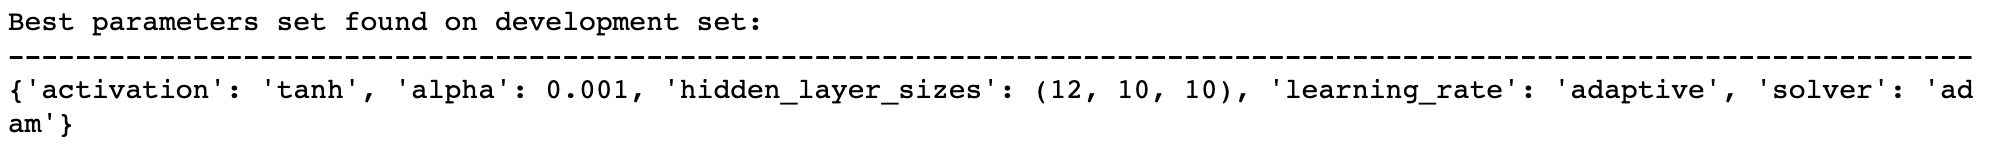

In [165]:
#param_grid = {
#    'hidden_layer_sizes': [(50,50,50),(100),(75,75),(75,75,75)],
#     'activation': 'relu',
#     'solver': 'adam',
#     'learning_rate_init': [0.0001, 0.001, 0.01, 0.1],
#}

In [166]:
#clf = GridSearchCV(MLPClassifier(activation = 'relu', solver = 'adam'), param_grid, cv=3,scoring='f1').fit(X_train,y_train)

In [167]:
#print('Best parameters: ',clf.best_estimator_)
#print('Score: ',clf.best_score_)

In [168]:
model = MLPClassifier(activation = 'relu', solver = 'adam', hidden_layer_sizes=100, learning_rate_init=0.01).fit(X_train,y_train)

In [169]:
f1_train = f1_score(y_train, model.predict(X_train),average="micro")
f1_val = f1_score(y_val, model.predict(X_val),average="micro")

In [170]:
print('Train: ',f1_train, '\nVal: ', f1_val)

Train:  0.952428964252979 
Val:  0.9204448246364414


In [171]:
#clf
#clf.predict(X_train)
#clf.predict(X_val)

In [172]:
#scores = pd.DataFrame(zip(means, stds, clf.cv_results_['params']), columns = ['mean', 'std','parameters'])
#scores.to_csv('NN_scores.csv',index=False)

In [173]:
#scores = pd.read_csv('NN_scores.csv')

In [174]:
#scores.sort_values(by='mean',ascending = False).round(3).head(1)

In [175]:
#best_parameters = {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (12, 10, 10), 'learning_rate': 'invscaling', 'solver': 'adam'}

### Best Model 

In [176]:
MLPClassifier(activation= 'tanh', alpha= 0.001, hidden_layer_sizes= (12, 10, 10), 
 learning_rate= 'invscaling', solver= 'adam')

MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=(12, 10, 10),
              learning_rate='invscaling')

In [177]:
model= MLPClassifier(activation= 'tanh', alpha= 0.001, hidden_layer_sizes= (12, 10, 10), 
                     learning_rate= 'invscaling', solver= 'adam').fit(X_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [178]:
f1_train = f1_score(y_train, model.predict(X_train),average="micro")
f1_val = f1_score(y_val, model.predict(X_val),average="micro")

In [179]:
print('Train: ',f1_train, '\nVal: ', f1_val)

Train:  0.9285976168652612 
Val:  0.924508126603935


    Train:  0.9071664222873901 
    Val:  0.904212101774642

In [180]:
labels_train = model.predict(X_train)
labels_val = model.predict(X_val)


In [181]:
from sklearn.metrics import classification_report, confusion_matrix

In [182]:
def report(y_train, train_labels, y_val, val_labels):
    print('                                       Classification Report TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------\n')
    print(classification_report(y_train, train_labels))
    print('\n                                         Confusion Matrix TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------\n')
    print(confusion_matrix(y_train, train_labels),'\n')
    
    print('___________________________________________________________________________________________________________\n')
    
    print('                                       Classification Report VAL                                                 ')
    print('-----------------------------------------------------------------------------------------------------------\n')
    print(classification_report(y_val, val_labels))
    print('\n                                         Confusion Matrix VAL                                                 ')
    print('-----------------------------------------------------------------------------------------------------------\n')
    print(confusion_matrix(y_val, val_labels),'\n')

In [183]:
report(y_train,labels_train,y_val,labels_val)

                                       Classification Report TRAIN                                                 
-----------------------------------------------------------------------------------------------------------

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      5932
         1.0       0.92      0.92      0.92      4978

    accuracy                           0.93     10910
   macro avg       0.93      0.93      0.93     10910
weighted avg       0.93      0.93      0.93     10910


                                         Confusion Matrix TRAIN                                                 
-----------------------------------------------------------------------------------------------------------

[[5543  389]
 [ 390 4588]] 

___________________________________________________________________________________________________________

                                       Classification Report VAL                       

### K-folds ( splits = 10)

In [184]:
#def score(method,X,y,model):
#    scores_train = []
#    scores_test = []
#    for train_index, test_index in method.split(X):
#        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#        model= model.fit(X_train, y_train)
#        f1_train = f1_score(y_train, model.predict(X_train),average="micro")
#        f1_test = f1_score(y_test, model.predict(X_test),average="micro")
#        scores_train.append(f1_train)
#        scores_test.append(f1_test)
#        
#    return [np.mean(f1_train),np.mean(f1_test)]

In [185]:
kf_nn = mlp_avg_score(kf,model)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multi

In [186]:
kf_nn

('7.726+/-0.15', '0.928+/-0.0', '0.916+/-0.01', '198.0+/-4.0')

In [187]:
print('Score for kfolds:',kf_nn[1])

Score for kfolds: 0.928+/-0.0


### Repeated K-Folds (splits = 10, repeats = 2)

In [188]:
rkf_nn = mlp_avg_score(rkf,model) #n_repeats = 2

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multi

In [189]:
rkf_nn

('7.881+/-0.23', '0.929+/-0.0', '0.919+/-0.01', '198.9+/-4.8')

In [190]:
print('Score for repeated kfolds:',rkf_nn[1])

Score for repeated kfolds: 0.929+/-0.0


In [191]:
NN = kf_nn

tested also with 3

<a class="anchor" id="rf">

## 19.3. Random Forest

</a>

In [192]:
X = train_copy.loc[:, train_copy.columns != 'Churn']
y = train_copy["Churn"]

In [193]:
X_trainrf, X_testrf, y_trainrf, y_testrf = train_test_split(X, y, test_size = 0.2, random_state = 55, stratify = y)

In [194]:
rfc = RandomForestClassifier(random_state=55)

In [195]:
# param_grid = { 
#     'n_estimators': [50, 100, 200],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'criterion' :['gini', 'entropy'],
#     'min_samples_leaf':[1, 2, 3],
#     'min_samples_split': [2, 3, 4]
# }

In [196]:
# param_grid = {
#      'n_estimators': [50, 100, 200],
#      'criterion': ['gini','entropy','log_loss'],
#      'max_depth': ['None', 5, 6],
#      'min_samples_split': [2, 10, 500],
#      'min_samples_leaf': [1, 200, 500],
#      'min_weight_fraction_leaf': [0.15, 0],
#      'max_features': ['None', 2, 0.5, 'auto', 'log2'],
#      'max_leaf_nodes': ['None', 30],
#      'ccp_alpha': [0, 0.00022567635288438118, 0.0009]
# }

In [197]:
# #Testing
# param_grid = {
#      'bootstrap': [False, True],
#      'class_weight': [None, 'balanced'],
#      'n_estimators': [50, 100],
#      'criterion': ['gini','entropy','log_loss'],
#      'max_depth': [1:1000],
#      'min_samples_split': [2, 5, 10],
#      'min_samples_leaf': [1],
#      'min_weight_fraction_leaf': [0.15, 0],
#      'max_features': [0.75, 1, 'log2'],
# }

In [198]:
# #Testing 2
# param_grid = {
# 'bootstrap': [False, True],
# 'criterion': ['gini','entropy'],
# 'max_depth': [500, 1000],
# 'max_leaf_nodes': [150, 200, 250],
# 'max_features': [0.75, 1],
# 'min_samples_split': [2, 5],
# 'min_weight_fraction_leaf': [0, 1, 2],
# 'n_estimators': [75, 100, 150]
# }

In [199]:
#Original - Accuracy
# cv_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid , cv= 3, scoring='accuracy') #cv = cross validation

In [200]:
#New one - F1
#cv_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid , cv= 3, scoring='f1') #cv = cross validation

In [201]:
#cv_rfc.fit(X_trainrf, y_trainrf)

In [202]:
# cv_rfc.best_params_

    Original
    {'ccp_alpha': 0.0009,
     'criterion': 'entropy',
     'max_depth': 6,
     'max_features': 'auto',
     'max_leaf_nodes': 30,
     'min_samples_leaf': 1,
     'min_samples_split': 2,
     'min_weight_fraction_leaf': 0}

    Testing 2 - F1
    {'bootstrap': False,
     'criterion': 'entropy',
     'max_depth': 500,
     'max_features': 0.75,
     'max_leaf_nodes': 250,
     'min_samples_split': 5,
     'min_weight_fraction_leaf': 0,
     'n_estimators': 150}

In [203]:
# print("Best parameters set found on development set:")
# print('---------------------------------------------------------------------------------------------------------------------')
# print(cv_rfc.best_params_)

    Best parameters set found on development set:
    ---------------------------------------------------------------------------------------------------------------------
    {'ccp_alpha': 0.0009, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'max_leaf_nodes': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}

In [204]:
# cv_rfc.score(X_testrf, y_testrf)

In [205]:
# cv_rfc_pred = cv_rfc.predict(X_testrf)

In [206]:
# print("Accuracy for Random Forest on CV data: ", accuracy_score(y_testrf, cv_rfc_pred))

n_estimators= 200 it's the best result over 10 tries

In [207]:
#Original
#model_rf= RandomForestClassifier(ccp_alpha=0.0009, criterion='entropy', max_depth=6, max_features='auto', max_leaf_nodes=30, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200)
#model_rf.fit(X_trainrf, y_trainrf)

In [208]:
#2nd
#model_rf= RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=1000, max_features=0.75, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0, n_estimators=100

In [209]:
# #3rd
# model_rf= RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=70, max_features=0.45, min_samples_leaf=7, min_samples_split=2, min_weight_fraction_leaf=0, n_estimators=100)
# #criterion='entropy', max_depth=6, max_features='auto', max_leaf_nodes=30, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200)

In [210]:
#4th
model_rf= RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=500, max_features=0.75, max_leaf_nodes=250, min_samples_split=5, min_weight_fraction_leaf=0, n_estimators=150)

In [211]:
model_rf.fit(X_trainrf, y_trainrf)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=500,
                       max_features=0.75, max_leaf_nodes=250,
                       min_samples_split=5, min_weight_fraction_leaf=0,
                       n_estimators=150)

In [212]:
f1_train = f1_score(y_trainrf, model_rf.predict(X_trainrf),average="micro")

In [213]:
f1_val = f1_score(y_testrf, model_rf.predict(X_testrf),average="micro")

In [214]:
print('Train: ',f1_train, '\nVal: ', f1_val)

Train:  0.9742540904716073 
Val:  0.9403463758819757


In [215]:
labels_trainrf = model_rf.predict(X_trainrf)
labels_valrf = model_rf.predict(X_testrf)

In [216]:
# report_rf= report(y_trainrf,labels_trainrf,y_testrf,labels_valrf)

### K-Folds

In [217]:
#kf_rf_score = score(kf, X,y, model_rf)
#kf_rf_score

In [218]:
kf_rf_score = avg_score(kf,model_rf)
kf_rf_score

('7.568+/-0.05', '0.969+/-0.0', '0.943+/-0.0')

In [219]:
RF = kf_rf_score

### Repeated K-Folds

In [220]:
#rkf_rf_score = score(rkf, X,y, model_rf)
#rkf_rf_score

In [221]:
rkf_rf_score = avg_score(rkf,model_rf)
rkf_rf_score

('7.543+/-0.05', '0.969+/-0.0', '0.943+/-0.01')

<a class="anchor" id="log">

## 19.4. Logistic Regression

</a>

https://www.projectpro.io/recipes/optimize-hyper-parameters-of-logistic-regression-model-using-grid-search-in-python <br>
https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8 <br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html <br>
https://realpython.com/logistic-regression-python/#logistic-regression-in-python

In [222]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [223]:
print('Train:', log_model.score(X_train, y_train))
print('Test:', log_model.score(X_val, y_val))

Train: 0.8109990834097158
Test: 0.8130881094952951


In [224]:
y_pred = log_model.predict(X_val)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_model.score(X_val, y_val)))

Accuracy of logistic regression classifier on test set: 0.81


In [225]:
#Confusion matrix
#1039 + 1382 correct predictions

confusion_matrix = confusion_matrix(y_val, y_pred)
print(confusion_matrix)

[[2131  412]
 [ 462 1671]]


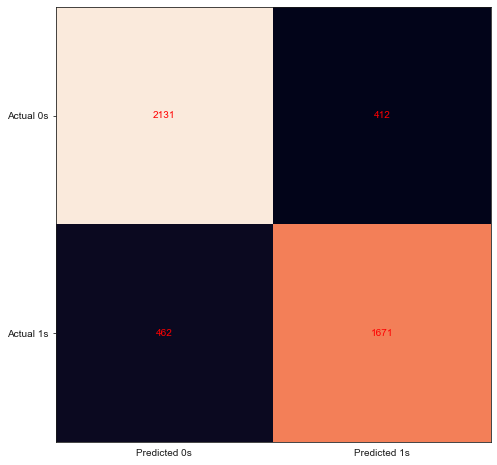

In [226]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(confusion_matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='red')
plt.show()

In [227]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83      2543
         1.0       0.80      0.78      0.79      2133

    accuracy                           0.81      4676
   macro avg       0.81      0.81      0.81      4676
weighted avg       0.81      0.81      0.81      4676



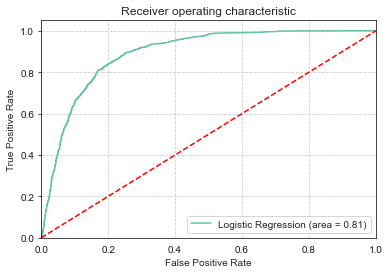

In [228]:
#ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_val, log_model.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, log_model.predict_proba(X_val)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [229]:
log_model.predict(X_val)

array([0., 0., 1., ..., 1., 1., 0.], dtype=float32)

In [230]:
log_model.score(X_val, y_val)

0.8130881094952951

### KFOLDS

In [231]:
rkf_lr_score = avg_score(kf,log_model)

### RKFOLDS

In [232]:
kf_lr_score = avg_score(rkf,log_model)

In [233]:
LR = rkf_lr_score

<a class="anchor" id="knn">

## 19.5. K Neighbors Classifier

</a>

In [234]:
modelKNN = KNeighborsClassifier()

In [235]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

In [236]:
grid = GridSearchCV(modelKNN, param_grid, cv=3, scoring='f1', return_train_score=True)

In [237]:
grid_search=grid.fit(X_train, y_train)

In [238]:
print('Best parameters:',grid_search.best_params_)

Best parameters: {'n_neighbors': 5}


In [239]:
print('Best estimator:',grid_search.best_estimator_)

Best estimator: KNeighborsClassifier()


In [240]:
modelKNN = KNeighborsClassifier(n_neighbors=6).fit(X_train,y_train)

In [241]:
f1_score = grid_search.best_score_ *100
f1_score

88.7601792697641

## BEST MODEL

In [242]:
modelKNN = grid_search.best_estimator_

In [243]:
modelKNN=modelKNN.fit(X = X_train, y = y_train)

In [244]:
labels_train = modelKNN.predict(X_train)
labels_val = modelKNN.predict(X_val)

In [245]:
modelKNN.predict_proba(X_val)

array([[0. , 1. ],
       [1. , 0. ],
       [0.2, 0.8],
       ...,
       [0. , 1. ],
       [0.2, 0.8],
       [0.6, 0.4]])

In [246]:
#report(y_train, labels_train, y_val, labels_val)

### K-Folds

In [247]:
kf_knn_score = avg_score(kf,modelKNN)

In [248]:
KNN = kf_knn_score
KNN

('0.002+/-0.0', '0.933+/-0.0', '0.905+/-0.01')

### Repeated K-Folds

In [249]:
rkf_knn_score = avg_score(rkf,modelKNN)
rkf_knn_score

('0.002+/-0.0', '0.933+/-0.0', '0.906+/-0.0')

<a class="anchor" id="dt">

## 19.6. Decision Trees

</a>

Overfitting: has learned the training data very well, but it fails to generalize on new input data (test set).Decision tree models generally tend to overfit.

We can now use Grid Search and Random Search methods to improve our model's performance (test accuracy score).

In [250]:
X = train_copy.loc[:, train_copy.columns != 'Churn']
y = train_copy["Churn"]

In [251]:
X_traindt, X_testdt, y_traindt, y_testdt = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)

In [252]:
#dt_gini = DecisionTreeClassifier()

In [253]:
#dt_gini.fit(X_traindt, y_traindt)

In [254]:
def show_results2(df, *args):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # for each model passed as argument
    for arg in args:
        # obtain the results provided by avg_score
        time, avg_train, avg_test = avg_score(kf, arg)
        # store the results in the right row
        df.iloc[count] = time, avg_train, avg_test
        count+=1
    return df

In [255]:
#from sklearn.tree import export_graphviz
#import graphviz
#import pydotplus

#def plot_tree(model):
#    dot_data = export_graphviz(model,
#                               feature_names=X_traindt.columns,  
#                               class_names=["Churn", "No Churn"],
#                               filled=True)
#    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
#    pydot_graph.set_size('"20,20"')
#    
#    return graphviz.Source(pydot_graph.to_string())

In [256]:
#plot_tree(dt_gini)

In [257]:
#y_pred = dt_gini.predict(X_testdt)
#y_pred

In [258]:
#y_pred_prob = dt_gini.predict_proba(X_testdt)
#y_pred_prob

In [259]:
#print('The defined three has a depth of ' + str(dt_gini.get_depth()) + ', ' + str(dt_gini.tree_.node_count) + 
#     ' nodes and a total of ' + str(dt_gini.get_n_leaves()) + ' leaves.')

In [260]:
#dt_entropy = DecisionTreeClassifier(criterion = 'entropy')
#dt_entropy.fit(X_traindt, y_traindt)

In [261]:
# df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['Gini','Entropy'])
# show_results2(df, dt_gini, dt_entropy)

**Prepruning - Max depth**

In [262]:
#Max depth=2

In [263]:
# dt_depth2 = DecisionTreeClassifier(max_depth = 2).fit(X_traindt, y_traindt)

In [264]:
# df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['full','depth2'])
# show_results2(df, dt_gini, dt_depth2)

In [265]:
#Max depth=3

In [266]:
# dt_depth3 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

In [267]:
# df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['full','depth3'])
# show_results2(df, dt_gini, dt_depth3)

In [268]:
#Max depth=4

In [269]:
# dt_depth4 = DecisionTreeClassifier(max_depth = 4).fit(X_traindt, y_traindt)

In [270]:
# df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['full','depth4'])
# show_results2(df, dt_gini, dt_depth4)

In [271]:
#Max depth=5

In [272]:
#dt_depth5 = DecisionTreeClassifier(max_depth = 5).fit(X_traindt, y_traindt)

In [273]:
# df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['full','depth5'])
# show_results2(df, dt_entropy, dt_depth5)

In [274]:
#Max depth=6

In [275]:
# dt_depth6 = DecisionTreeClassifier(max_depth = 6).fit(X_traindt, y_traindt)

In [276]:
# df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['full','depth2', 'depth3', 'depth4', 'depth5','depth6'])
# show_results2(df, dt_entropy,dt_depth2, dt_depth3, dt_depth4, dt_depth5, dt_depth6)

In [277]:
# plot_tree(dt_depth6)

**Prepruning - Max leaf nodes**

In [278]:
# dt_maxleaf30 = DecisionTreeClassifier(max_leaf_nodes = 30).fit(X_traindt, y_traindt)

# df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['Baseline','dt_maxleaf30'])
# show_results2(df,dt_entropy, dt_maxleaf30)

In [279]:
# plot_tree(dt_maxleaf30)

**Prepruning - Min samples leaf**

In [280]:
# dt_min_sam200 = DecisionTreeClassifier(min_samples_leaf = 200).fit(X_traindt, y_traindt)

In [281]:
# dt_min_sam500 = DecisionTreeClassifier(min_samples_leaf = 500).fit(X_traindt, y_traindt)

In [282]:
# df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['dt_min_sam1','dt_min_sam200','dt_min_sam500'])
# show_results2(df,dt_gini, dt_min_sam200, dt_min_sam500)

In [283]:
# plot_tree(dt_min_sam200)

**Prepruning - Max features**

DecisionTreeClassifier:
- where __max_features = None__ and name it as __dt_none__ (The baseline model)
- where __max_features = 2__ and name it as __dt_int__
- where __max_features = 0.5__ and name it as __dt_float__
- where __max_features = 'auto'__ and name it as __dt_auto__
- where __max_features = 'log2'__ and name it as __dt_log2__

In [284]:
#dt_none = DecisionTreeClassifier(max_features = None).fit(X_traindt, y_traindt)
#dt_int = DecisionTreeClassifier(max_features = 2).fit(X_traindt, y_traindt)
#dt_float = DecisionTreeClassifier(max_features = 0.5).fit(X_traindt, y_traindt)
#dt_auto = DecisionTreeClassifier(max_features = 'auto').fit(X_traindt, y_traindt)
#dt_log2 = DecisionTreeClassifier(max_features = 'log2').fit(X_traindt, y_traindt)

In [285]:
#df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['None (Baseline)','Int','Float','Auto','Log2'])
#show_results2(df,dt_none, dt_int, dt_float, dt_auto, dt_log2)

**Prepruning - Min samples split**

Changing the minimum number of samples required to split an internal node

In [286]:
#dt_min10 = DecisionTreeClassifier(min_samples_split=20).fit(X_traindt, y_traindt)
#dt_min500 = DecisionTreeClassifier(min_samples_split=500).fit(X_traindt, y_traindt)

In [287]:
#df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['dt_min0','dt_min20','dt_min500'])
#show_results2(df,dt_gini, dt_min10, dt_min500)

**Preprunning - Min weight**

Changing the minimum number of samples required to be at a leaf node

In [288]:
#dt_min_weight0 = DecisionTreeClassifier(min_weight_fraction_leaf=0).fit(X_traindt, y_traindt)
#dt_min_weight15 = DecisionTreeClassifier(min_weight_fraction_leaf=0.15).fit(X_traindt, y_traindt)

In [289]:
#df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['dt_min_weight0','dt_min_weight15'])
#show_results2(df,dt_gini, dt_min_weight15)

**Preprunning - Changing the splitter**

In [290]:
#dt_random= DecisionTreeClassifier(splitter='random').fit(X_traindt, y_traindt)

In [291]:
#df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['dt_best','dt_random'])
#show_results2(df,dt_gini, dt_random)

**Postprunning - ccp_alpha**

__`GOAL`__ To find an optimal value of effective alpha which gives the maximum validation/test set accuracy.

In [292]:
#dt_alpha = DecisionTreeClassifier(random_state=0)
#path = dt_alpha.cost_complexity_pruning_path(X_traindt, y_traindt)
#ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [293]:
#fig, ax = plt.subplots(figsize = (10,10))
#ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
#ax.set_xlabel("effective alpha", fontsize=15)
#ax.set_ylabel("total impurity of leaves", fontsize=15)
#ax.set_title("Total Impurity vs effective alpha for training set", fontsize=15)

In [294]:
# trees = []
# for ccp_alpha in ccp_alphas:
#     dt_alpha = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha).fit(X_traindt, y_traindt)
#     trees.append(dt_alpha)
# print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(trees[-1].tree_.node_count, ccp_alphas[-1]))

In [295]:
#trees = trees[:-1]
#ccp_alphas = ccp_alphas[:-1]

#node_counts = [tree.tree_.node_count for tree in trees]
#depth = [tree.get_depth() for tree in trees]

#fig, ax = plt.subplots(2, 1, figsize=(20, 15))
#ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
#ax[0].set_xlabel("alpha", fontsize=15)
#ax[0].set_ylabel("number of nodes", fontsize=15)
#ax[0].set_title("Number of nodes vs alpha", fontsize=15)
#ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
#ax[1].set_xlabel("alpha", fontsize=15)
#ax[1].set_ylabel("depth of tree", fontsize=15)
#ax[1].set_title("Depth vs alpha", fontsize=15)
#fig.tight_layout()

In [296]:
#train_scores = [tree.score(X_traindt, y_traindt) for tree in trees]
#test_scores = [tree.score(X_testdt, y_testdt) for tree in trees]

#fig, ax = plt.subplots(figsize = (10,10))
#ax.set_xlabel("alpha", fontsize=15)
#ax.set_ylabel("accuracy", fontsize=15)
#ax.set_title("Accuracy vs alpha for training and testing sets")
#ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
#ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
#ax.legend()
#plt.show()

In [297]:
# dt_alpha0 = DecisionTreeClassifier(ccp_alpha=0).fit(X_traindt, y_traindt)
# dt_alpha00009 = DecisionTreeClassifier(ccp_alpha=0.0009).fit(X_traindt, y_traindt)
# dt_alpha0001 = DecisionTreeClassifier(ccp_alpha=0.001).fit(X_traindt, y_traindt)
# dt_alpha0002 = DecisionTreeClassifier(ccp_alpha=0.002).fit(X_traindt, y_traindt)

# df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['dt_alpha0', 'dt_alpha00009','dt_alpha0001', 'dt_alpha0002'])
# show_results2(df,dt_alpha0, dt_alpha00009, dt_alpha0001, dt_alpha0002)

In [298]:
#index_best_model = np.argmax(test_scores)
#best_model = trees[index_best_model]
#print('ccp_alpha of best model: ',trees[index_best_model])
#print('_____________________________________________________________')
#print('Training accuracy of best model: ',best_model.score(X_traindt, y_traindt))
#print('Test accuracy of best model: ',best_model.score(X_testdt, y_testdt))

ccp_alpha of best model:  DecisionTreeClassifier(ccp_alpha=0.00020619265266847662, random_state=0)
_____________________________________________________________
Training accuracy of best model:  0.9575815892871462
Test accuracy of best model:  0.9371391917896087

In [299]:
#dt_postprunning = DecisionTreeClassifier(ccp_alpha = 0.00021382941758212384).fit(X_traindt, y_traindt)
#plot_tree(dt_postprunning)

<hr>
<a class="anchor" id="gridsearchnn">

### 19.2.1. Grid Search Decision Tree
    
</a>

In [300]:
#param_grid = {
#   'criterion': ['gini','entropy', 'log_loss'],
#    'splitter': ['best', 'random'],
#    'max_depth': ['None',5 ,6],
#    'min_samples_split': [2, 10, 500],
#    'min_samples_leaf': [1, 200, 500],
#    'min_weight_fraction_leaf': [0.15, 0],
#    'max_features': ['None', 2, 0.5, 'auto', 'log2' ],
#    'max_leaf_nodes': ['None', 30],
#    'ccp_alpha': [0, 0.00021382941758212384, 0.0009]
#}

In [301]:
#clf_dtree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3,scoring='f1') #cv = cross validation

epochs = number of passes of the entire training dataset the machine learning algorithm has completed

In [302]:
# clf_dtree.fit(X_traindt,y_traindt)
# clf_dtree.predict(X_traindt)
# clf_dtree.predict(X_testdt)

In [303]:
#print("Best parameters set found on development set:")
#print('---------------------------------------------------------------------------------------------------------------------')
#print(clf_dtree.best_params_)

Best parameters set found on development set:

{'ccp_alpha': 0.0009, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 0.5, 'max_leaf_nodes': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0, 'splitter': 'best'}

In [304]:
# print("Parameters:")
# print('---------------------------------------------------------------------------------------------------------------------')
# means = clf_dtree.cv_results_['mean_test_score']
# stds = clf_dtree.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, clf_dtree.cv_results_['params']):
#     print("Mean score: %0.3f (std: +/-%0.03f) for %r" % (mean, std * 2, params))

In [305]:
model_dtree= DecisionTreeClassifier(ccp_alpha=0.0009, criterion='gini', max_depth= 6, max_features= 0.5,
                                     max_leaf_nodes=30, min_samples_leaf= 1, min_samples_split= 2,
                                     min_weight_fraction_leaf= 0, splitter= 'best')
model_dtree.fit(X_traindt, y_traindt)

DecisionTreeClassifier(ccp_alpha=0.0009, max_depth=6, max_features=0.5,
                       max_leaf_nodes=30, min_weight_fraction_leaf=0)

In [306]:
#f1_val = f1_score(y_testdt, model_dtree.predict(X_testdt),average="micro")

In [307]:
print('Train: ',f1_train, '\nVal: ', f1_val)

Train:  0.9742540904716073 
Val:  0.9403463758819757


    Train:  0.8712212332611659 
    Val:  0.8691468890314304

In [308]:
labels_traindt = model_dtree.predict(X_traindt)
labels_valdt = model_dtree.predict(X_testdt)

In [309]:
#report_dtree= report(y_traindt,labels_traindt,y_testdt,labels_valdt)

### K-Folds

In [310]:
#kf_dtree_score = score(kf, X_traindt,y, model_dtree)

In [311]:
kf_dtree_score = avg_score(kf,model_dtree)

In [312]:
kf_dtree_score

('0.021+/-0.0', '0.884+/-0.01', '0.88+/-0.01')

### Repeated K-Folds

In [313]:
#rkf_dtree_score = score(rkf, X,y, model_dtree)

In [314]:
rkf_dtree_score = avg_score(kf,model_dtree)

In [315]:
DT = avg_score(kf,model_dtree)

In [316]:
DT

('0.022+/-0.0', '0.881+/-0.0', '0.881+/-0.01')

<a class="anchor" id="nb">

## 19.7. Naive Bayes

</a>

In [317]:
from sklearn.naive_bayes import GaussianNB

In [318]:
nbayes = GaussianNB().fit(X_train, y_train)

In [319]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [320]:
clf_nbayes = GridSearchCV(GaussianNB(), param_grid_nb, cv=3,scoring='f1')

In [321]:
clf_nbayes.fit(X_train,y_train)
clf_nbayes.predict(X_train)
clf_nbayes.predict(X_val)

array([0., 0., 1., ..., 1., 1., 0.], dtype=float32)

In [322]:
print("Best parameters set found on development set:")
print('---------------------------------------------------------------------------------------------------------------------')
print(clf_nbayes.best_params_)

Best parameters set found on development set:
---------------------------------------------------------------------------------------------------------------------
{'var_smoothing': 0.001873817422860383}


In [323]:
model_nbayes= GaussianNB(var_smoothing= 0.001873817422860383).fit(X_train, y_train)

In [324]:
#f1_train = f1_score(X_train, model_nbayes.predict(y_train),average="micro")

In [325]:
#f1_val = f1_score(y_val, model_nbayes.predict(X_val),average="micro")

In [326]:
#print('Train: ',f1_train, '\nVal: ', f1_val)

    Train:  0.8749598973371832
    Val:  0.8704297626683771

In [327]:
labels_train_nbayes = nbayes.predict(X_train)
labels_val_nbayes = nbayes.predict(X_val)

In [328]:
#report_nbayes= report(y_train,labels_train_nbayes,y_val,labels_val_nbayes)

### K-Folds

In [329]:
kf_nbayes_score = avg_score(kf,model_nbayes)

In [330]:
NB = kf_nbayes_score

In [331]:
NB

('0.005+/-0.0', '0.822+/-0.0', '0.822+/-0.01')

### Repeated K-Folds

In [332]:
rkf_nbayes_score = avg_score(rkf,model_nbayes)

<a class="anchor" id="svm">

## 19.8. Support Vector Machine - SVC (Classifier)

</a>

https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/

In [333]:
#param_grid = {'C': [0.1, 1, 10, 100, 1000],
#              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#              'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']}
# 
#grid = GridSearchCV(SVC(), param_grid, refit = True, scoring = 'f1')

In [334]:
#param_grid = {'C': [5,10,20],
#              'gamma': [1, 0.1, 0.2, 0.3],
#              'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']}
# 
#grid = GridSearchCV(SVC(), param_grid, refit = True, scoring = 'f1')

In [335]:
#grid.fit(X_train, y_train)

In [336]:
#print('Best parameters:',grid.best_params_)
#print('Best estimator:',grid.best_estimator_)

    Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
    Best estimator: SVC(C=10, gamma=0.1)

In [337]:
# grid_predictions = grid.predict(X_val)

In [338]:
#print(classification_report(y_val, grid_predictions))

                  precision    recall  f1-score   support

             0.0       0.90      0.88      0.89      2134
             1.0       0.90      0.92      0.91      2543

        accuracy                           0.90      4677
       macro avg       0.90      0.90      0.90      4677
    weighted avg       0.90      0.90      0.90      4677

In [339]:
# grid.best_estimator_

In [340]:
svc_model = SVC(C=10, gamma=0.1).fit(X_train, y_train)

In [341]:
print('Train: ',svc_model.score(X_train, y_train))
print('Val: ',svc_model.score(X_val, y_val))

Train:  0.9386801099908341
Val:  0.9217279726261762


    Train:  0.9386913489736071
    Val:  0.9208894590549498

### KFOLDS

In [342]:
kf_svc_score = avg_score(kf,svc_model)

In [343]:
kf_svc_score

('7.098+/-0.13', '0.996+/-0.0', '0.93+/-0.0')

    ('7.043+/-0.1', '0.996+/-0.0', '0.93+/-0.0')

In [344]:
SVM = kf_svc_score

### Repeated Kfolds

In [345]:
rf_svc_score = avg_score(rkf,svc_model)

In [346]:
rf_svc_score

('7.018+/-0.08', '0.996+/-0.0', '0.929+/-0.01')

<a class="anchor" id="gradientboost">

## 19.9. Gradient Boosting Classifier

</a>

https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/

In [347]:
#    parameter_space = {
#        'loss':['log_loss','deviance'],
#        'learning_rate':[0.08,0.1,0.12,0.14],
#        'n_estimators':[500,750,1000,1100],
#        'subsample':[0.5,0.75,1],
#        'min_samples_leaf':[1,2],
#        'max_depth':[3,4,5],
#        'max_features':['auto','sqrt','log2']
#}

In [348]:
from sklearn.ensemble import GradientBoostingClassifier

In [349]:
#param_test1 = {'n_estimators':range(90,100,1)}
#gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,
#                                                               max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
#param_grid = param_test1, scoring='f1',n_jobs=4,cv=5)
#gsearch1.fit(X_train,y_train)

In [350]:
#print('Parameters:',gsearch1.best_estimator_)
#print('Score: ',gsearch1.best_score_)

In [351]:
X_test = X[X.columns[X.columns != 'Wifi']]

In [352]:
Gboost = GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                           min_samples_leaf=50, min_samples_split=500,
                           n_estimators=93, random_state=10, subsample=0.8).fit(X_test,y)

In [353]:
feat_importance = pd.DataFrame(zip(Gboost.feature_importances_,X_test.columns),columns = ['values','feat']).sort_values(by='values',ascending = False)
feat_importance

,values,feat
5,0.203783,Amenities
1,0.163631,Comfort
7,0.116098,OnlineBooking
6,0.090405,Staff
18,0.055995,RoomType_single
16,0.049849,Longevity_yes
15,0.044915,Female
3,0.037180,FoodDrink
17,0.031938,TypeTravel_leisure
9,0.028931,RoomSpace


### KFolds

In [354]:
gb = avg_score(kf,Gboost)

In [355]:
gb

('1.183+/-0.0', '0.952+/-0.0', '0.94+/-0.01')

### Repeated KFolds

In [356]:
gb = avg_score(rkf,Gboost)

In [357]:
gb

('1.196+/-0.02', '0.953+/-0.0', '0.939+/-0.01')

__Results__:

        Without Wifi: ('1.18+/-0.01', '0.953+/-0.0', '0.94+/-0.01') -> Tried in Kaggle, best performer
        Without RewardPoints: ('1.198+/-0.01', '0.952+/-0.0', '0.939+/-0.01')
        Without Comfort: ('1.188+/-0.01', '0.952+/-0.0', '0.94+/-0.0')
        Without Wifi and Comfort: ('1.187+/-0.01', '0.953+/-0.0', '0.939+/-0.01')
        Without Wifi and ReceptionSchedule: ('1.189+/-0.01', '0.952+/-0.0', '0.939+/-0.0')
        Without ReceptionSchedule: ('1.186+/-0.01', '0.952+/-0.0', '0.94+/-0.0') -> Worse than without Wifi in Kaggle
        Without 'FoodDrink':('1.184+/-0.01', '0.952+/-0.0', '0.939+/-0.0')
        Without Location: ('1.187+/-0.01', '0.952+/-0.0', '0.94+/-0.0') 
        Without Location and Wifi:('1.194+/-0.03', '0.953+/-0.0', '0.939+/-0.01')
        Without Wifi,'Staff':('1.187+/-0.02', '0.952+/-0.0', '0.94+/-0.01') 
        Without Staff:('1.196+/-0.02', '0.953+/-0.0', '0.939+/-0.01')
        Without OnlineBooking and Wifi:('1.189+/-0.01', '0.952+/-0.0', '0.94+/-0.01')
        Without OnlineBooking: ('1.185+/-0.01', '0.953+/-0.0', '0.94+/-0.01')
        Without RoomSpace: 
        Without RoomSpace and Wifi: ('1.205+/-0.01', '0.953+/-0.0', '0.94+/-0.0')--> Try in Kaggle
        Without 'Female' and Wifi: ('1.199+/-0.01', '0.953+/-0.0', '0.939+/-0.01')
        Without 'Longevity_yes' and Wifi: ('1.2+/-0.01', '0.952+/-0.0', '0.94+/-0.01')
        Without TypeTravel_leisure and Wifi: ('1.2+/-0.03', '0.953+/-0.0', '0.939+/-0.01')
        Without RoomTypeSingle and Wifi: ('1.201+/-0.02', '0.952+/-0.0', '0.941+/-0.01') --> Tested in Kaggle, only noWifi
        Without 'Comfort' and Wifi: ('1.19+/-0.01', '0.952+/-0.0', '0.939+/-0.01')
        Without 'Staff': ('1.191+/-0.01', '0.952+/-0.0', '0.94+/-0.01')
        Without 'RoomType_suite': ('1.201+/-0.01', '0.952+/-0.0', '0.939+/-0.01')
        Without 'FoodDrink'and Wifi:('1.201+/-0.01', '0.952+/-0.0', '0.94+/-0.01') -> Test in Kaggle

<a class="anchor" id="extratrees">

## 19.10. Extra-Trees Ensemble

</a>

https://towardsdatascience.com/ensemble-models-5a62d4f4cb0c

In [358]:
from sklearn.ensemble import ExtraTreesClassifier

### Test

In [359]:
#etc = ExtraTreesClassifier(n_estimators = 100,random_state=5).fit(X2, y)

In [360]:
#etc = avg_score(rkf,etc)
#etc

    n_estimators = 300: ('3.386+/-0.02', '1.0+/-0.0', '0.941+/-0.01')
    n_estimators = 200: ('1.139+/-0.01', '1.0+/-0.0', '0.941+/-0.01')
    n_estimators = 100: ('1.139+/-0.01', '1.0+/-0.0', '0.941+/-0.01')
    n_estimators = 50:  ('0.566+/-0.01', '1.0+/-0.0', '0.94+/-0.01')
    n_estimators = 20:  ('0.229+/-0.0', '1.0+/-0.0', '0.935+/-0.01')
    n_estimators = 10:  ('0.229+/-0.0', '1.0+/-0.0', '0.939+/-0.01')

    max_depth = 1300: ('0.879+/-0.0', '0.994+/-0.0', '0.919+/-0.01')
    max_depth = 1250: ('0.884+/-0.01', '0.994+/-0.0', '0.919+/-0.01')
    max_depth = 1200: ('0.892+/-0.01', '0.994+/-0.0', '0.919+/-0.01')
    max_depth = 1150: ('0.892+/-0.01', '0.994+/-0.0', '0.918+/-0.01')
    max_depth = 800: ('0.892+/-0.01', '0.994+/-0.0', '0.92+/-0.01')
    max_depth = 600: ('0.886+/-0.01', '0.994+/-0.0', '0.918+/-0.01')
    max_depth = 200: ('0.881+/-0.01', '0.994+/-0.0', '0.919+/-0.01')

### Grid Search

In [361]:
param_1 = {
    'criterion': ['gini', 'entropy', 'log_loss'], 
    'max_depth' : [50,100,150], #Tested the max_depth before, better less than 200, as it was overfitting
    'max_features': [0.5,0.7,0.9], #round(max_features * n_features)
    'class_weight': ['balanced','balanced_subsample',None], 
    'warm_start':[True,False], #default = False (fit a new forest), True: reuse the solution of the previous call to fit and add more estimators to the ensemble
    'n_jobs': [None,2,5], 
    'max_samples': [None,0.9,1.1], #testing with more and less of the default samples, see if it improves the result
    
}
# min_samples_split =  minimum number of samples required to split an internal node,default=2
#min_samples_leaf = minimum number of samples required to be at a leaf node, default = 1
# max_dept = None = expanded till all leaves are pure/all leaves contain less than min_samples_split samples.
#n_jobs = default = None that means 1
#ccp_alpha = default=0.0  
# max_samples = default=None = if default = X.shape[0]; If float draw max_samples * X.shape[0]
#class_weight = None = all classes are supposed to have weight one

In [362]:
#param_2 = {'min_samples_split':[2,0.8,1.2],
#           'min_samples_leaf':[1,0.8,1.2]
#           'ccp_alpha':[0,]
#          }

In [363]:
#ET_grid_search = GridSearchCV(estimator=etc,param_grid = param_2,scoring='f1',cv=5).fit(X2,y)

In [364]:
#print('Best Parameters:',ET_grid_search.best_estimator_)

    Best Parameters: ExtraTreesClassifier(class_weight='balanced', criterion='entropy', max_depth=50,
                         max_features=0.9, random_state=5, warm_start=True)

### Best Model

In [365]:
model_etc =ExtraTreesClassifier(class_weight='balanced', criterion='entropy', max_depth=50,
                     max_features=0.9, random_state=0, warm_start=True).fit(X,y)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '


In [366]:
### KFOLDS

In [367]:
scores_etc =  avg_score(kf,model_etc)
scores_etc

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs fro

('0.006+/-0.0', '1.0+/-0.0', '1.0+/-0.0')

    ('0.006+/-0.0', '1.0+/-0.0', '1.0+/-0.0')

In [368]:
### Repeated Kfolds

In [369]:
scores_etc =  avg_score(rkf,model_etc)
scores_etc

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs fro

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs fro

('0.006+/-0.0', '1.0+/-0.0', '1.0+/-0.0')

    ('0.006+/-0.0', '1.0+/-0.0', '1.0+/-0.0')

<a class="anchor" id="Adaboost">

## 19.11. Adaboost

</a>

In [370]:
from sklearn.ensemble import AdaBoostClassifier

### Test

In [371]:
#abc = AdaBoostClassifier(n_estimators=50,learning_rate=1).fit(X_test, y)

In [372]:
#adaboost = avg_score(rkf,abc)

In [373]:
#adaboost

### Grid Search

In [374]:
#grid = {'n_estimators': [10, 50, 100, 500],
#       'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1.0]}

#grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, n_jobs=-1, cv=cv, scoring='f1')

#grid_result = grid_search.fit(X_test,y)

In [375]:
#grid_result.best_estimator_

### Best Model

In [376]:
abc = AdaBoostClassifier(n_estimators=500).fit(X_test, y)

### Repeated KFOLDS

In [377]:
adaboost = avg_score(rkf,abc)
adaboost

('5.847+/-0.07', '0.905+/-0.0', '0.9+/-0.01')

    ('5.806+/-0.03', '0.905+/-0.0', '0.899+/-0.01')

<hr>
<a class="anchor" id="modelscomparison">
    
# 19. Models Comparison
    
</a>

<a class="anchor" id="acc">

## 19.1. Accuracies

</a>

In [378]:
scores_val = [LR[1],NB[1],DT[1],RF[1],adaboost[1],NN[1],KNN[1],SVM[1],gb[1],scores_etc[1]]
scores_test = [LR[2],NB[2],DT[2],RF[2],adaboost[2],NN[2],KNN[2],SVM[2],gb[2],scores_etc[2]]
models = ["Logistic Regression","Naive Bayes","Decision Trees","Random Forest",'Adaboost',"Neural Networks",
          "K Nearest-Neighbor ","Support vector machine",'Gradient Boosting','Extra Trees']

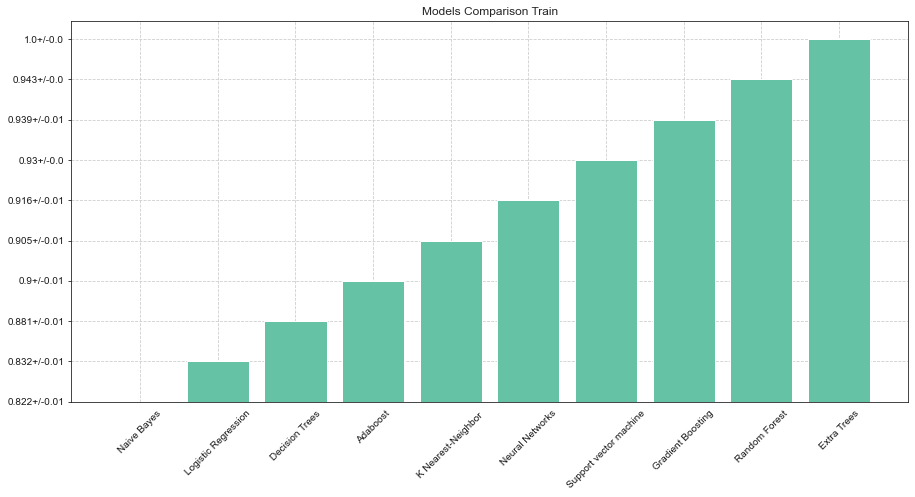

In [383]:
data_tuples = list(zip(models, scores_test))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.figure(figsize=(15,7))
plt.bar(data[0], data[1])
plt.title('Models Comparison Train')
plt.xticks(rotation = 45)
plt.show()

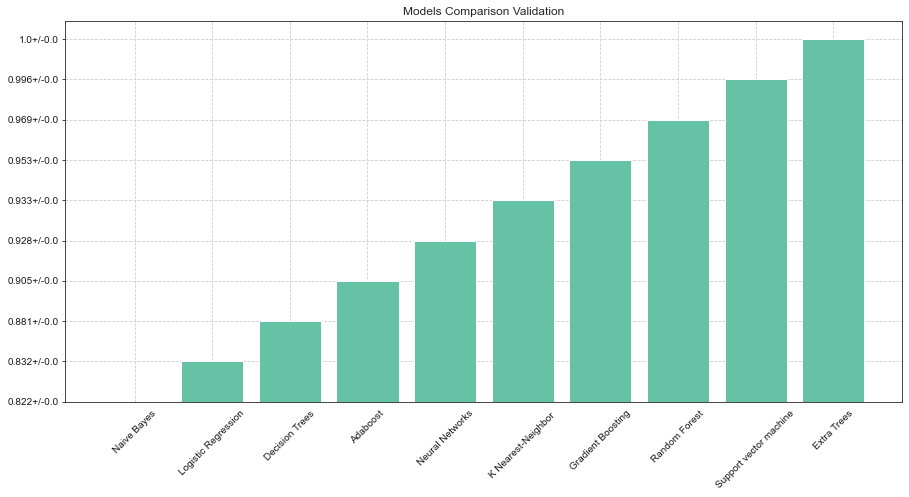

In [382]:
data_tuples = list(zip(models, scores_val))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.figure(figsize=(15,7))
plt.bar(data[0], data[1])
plt.title('Models Comparison Validation')
plt.xticks(rotation = 45)
plt.show()

In [384]:
log_reg=LogisticRegression(random_state=0).fit(X_train,y_train)
nb=GaussianNB(var_smoothing= 1.519911082952933e-08).fit(X_train, y_train)
dt=DecisionTreeClassifier(ccp_alpha=0.0009, criterion='entropy', max_depth= 6, max_features= 0.5,
                                     max_leaf_nodes=30, min_samples_leaf= 1, min_samples_split= 2,
                                     min_weight_fraction_leaf= 0, splitter= 'best').fit(X_traindt, y_traindt)
rf=RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=500, max_features=0.75, max_leaf_nodes=250,
                          min_samples_split=5, min_weight_fraction_leaf=0, n_estimators=150).fit(X_trainrf, y_trainrf)
ada = AdaBoostClassifier(n_estimators=500).fit(X_train, y_train)
knn= KNeighborsClassifier(n_neighbors = 9).fit(X_train,y_train)
nn=MLPClassifier(random_state=0,activation = 'tanh',alpha = 0.001 , hidden_layer_sizes=(12,10,10),
                 learning_rate = 'adaptive', solver = 'adam').fit(X_train,y_train)
svm = SVC(C=1000, gamma=0.01).fit(X_train, y_train).fit(X_train, y_train)
gb = GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                           min_samples_leaf=50, min_samples_split=500,
                           n_estimators=93, random_state=10, subsample=0.8).fit(X_train,y_train)
et = ExtraTreesClassifier(class_weight='balanced', criterion='entropy', max_depth=50,
                     max_features=0.9, random_state=0, warm_start=True).fit(X_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '


In [385]:
from sklearn import metrics

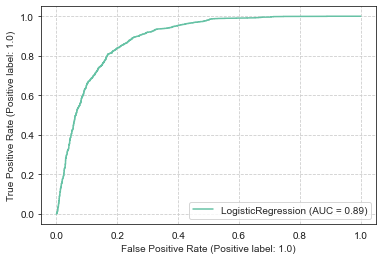

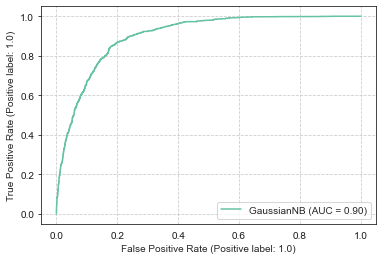

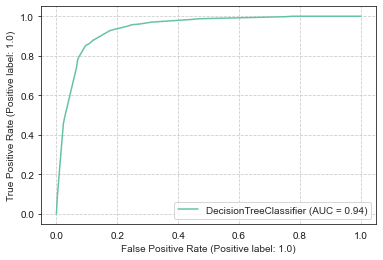

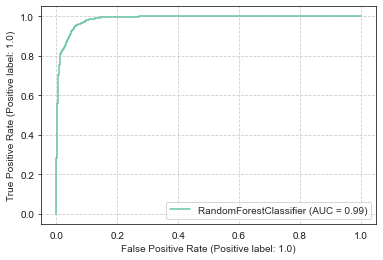

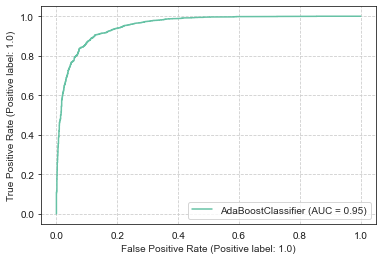

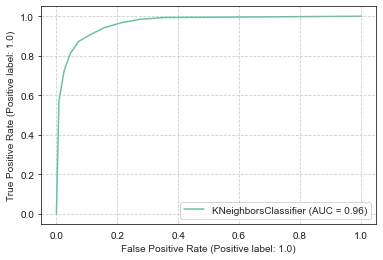

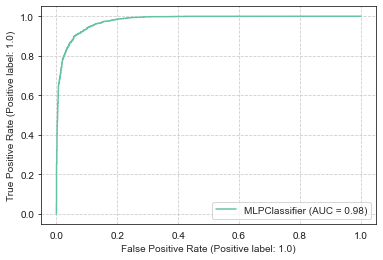

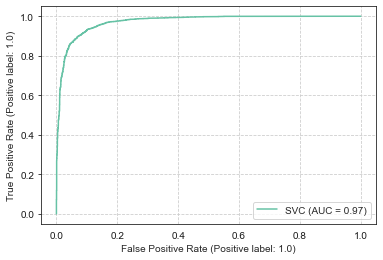

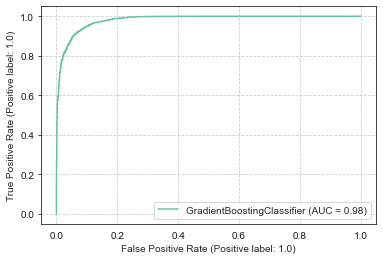

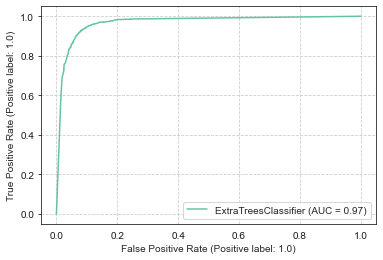

In [386]:
metrics.plot_roc_curve(log_reg, X_val, y_val) 
metrics.plot_roc_curve(nb, X_val, y_val) 
metrics.plot_roc_curve(dt, X_testdt, y_testdt) 
metrics.plot_roc_curve(rf, X_testrf, y_testrf) 
metrics.plot_roc_curve(ada, X_val, y_val) 
metrics.plot_roc_curve(knn, X_val, y_val) 
metrics.plot_roc_curve(nn, X_val, y_val) 
metrics.plot_roc_curve(svm, X_val, y_val) 
metrics.plot_roc_curve(gb, X_val, y_val) 
metrics.plot_roc_curve(et, X_val, y_val) 
plt.show()

In [387]:
classifiers = [LogisticRegression(random_state=0),
               GaussianNB(var_smoothing= 1.519911082952933e-08),
               DecisionTreeClassifier(ccp_alpha=0.0009, criterion='entropy', max_depth= 6, max_features= 0.5,
                                     max_leaf_nodes=30, min_samples_leaf= 1, min_samples_split= 2,
                                     min_weight_fraction_leaf= 0, splitter= 'best'),
               RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=500, max_features=0.75, max_leaf_nodes=250, 
                                      min_samples_split=5, min_weight_fraction_leaf=0, n_estimators=150).fit(X_trainrf, y_trainrf),
               AdaBoostClassifier(n_estimators=500),
               KNeighborsClassifier(n_neighbors = 9),
               MLPClassifier(random_state=0,activation = 'tanh',alpha = 0.001 , 
                             hidden_layer_sizes=(12,10,10),learning_rate = 'adaptive', solver = 'adam'),
               SVC(C=1000, gamma=0.01).fit(X_train, y_train),
               GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                           min_samples_leaf=50, min_samples_split=500,
                           n_estimators=93, random_state=10, subsample=0.8),
               ExtraTreesClassifier(class_weight='balanced', criterion='entropy', max_depth=50,
                     max_features=0.9, random_state=0, warm_start=True)
              ]

In [388]:
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['Models','Classifiers', 'Train','Val'])

In [391]:
result_table['Models'] = models
result_table['Classifiers'] = classifiers
result_table['Train']=scores_test
result_table['Val']=scores_val

In [392]:
result_table

,Models,Classifiers,Train,Val
0,Logistic Regression,LogisticRegression(random_state=0),0.832+/-0.01,0.832+/-0.0
1,Naive Bayes,GaussianNB(var_smoothing=1.519911082952933e-08),0.822+/-0.01,0.822+/-0.0
2,Decision Trees,"DecisionTreeClassifier(ccp_alpha=0.0009, crite...",0.881+/-0.01,0.881+/-0.0
3,Random Forest,"(DecisionTreeClassifier(criterion='entropy', m...",0.943+/-0.0,0.969+/-0.0
4,Adaboost,AdaBoostClassifier(n_estimators=500),0.9+/-0.01,0.905+/-0.0
5,Neural Networks,KNeighborsClassifier(n_neighbors=9),0.916+/-0.01,0.928+/-0.0
6,K Nearest-Neighbor,"MLPClassifier(activation='tanh', alpha=0.001, ...",0.905+/-0.01,0.933+/-0.0
7,Support vector machine,"SVC(C=1000, gamma=0.01)",0.93+/-0.0,0.996+/-0.0
8,Gradient Boosting,"GradientBoostingClassifier(max_depth=8, max_fe...",0.939+/-0.01,0.953+/-0.0
9,Extra Trees,"ExtraTreesClassifier(class_weight='balanced', ...",1.0+/-0.0,1.0+/-0.0


<hr>
<a class="anchor" id="predictions">
    
# 18. Predictions
    
</a>

#### Create final model

In [393]:
#Best Model
## Tried in Kaggle, with Wifi, without Wifi and with all feature selection excluded, best one is to exclude Wifi
#final_model = GradientBoostingClassifier(max_depth=8, max_features='sqrt',
#                           min_samples_leaf=50, min_samples_split=500,
#                           n_estimators=93, random_state=10, subsample=0.8).fit(X,y)

In [394]:
#Score: 0.94467
final_model = ExtraTreesClassifier(class_weight='balanced', criterion='entropy', max_depth=50,
                     max_features=0.9, random_state=0, warm_start=True).fit(X2,y)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '


In [395]:
#Read test dataset and set customer ID as index
test = pd.read_csv("data/test.csv")
test=test.set_index("Cust_ID")

#Remove duplicates?

#Impute missing values using same method used in the training set
data_numericaltest = test.select_dtypes(include='number')
imputed_matrix_test = imputer.transform(data_numericaltest)
datatest_cleaned = pd.DataFrame(data=imputed_matrix_test, columns=data_numericaltest.columns, index=data_numericaltest.index)

#Transforming variables
test['Age'] = date.today().year - test.Year_Birth
test['Longevity'] = test['Longevity'].replace('y','yes')
test['Wifi'].clip(lower= 0, upper= 5, inplace= True)
test['Female'] = (test['Name'].str.contains('Ms')).astype(int)

#Drop variables
test.drop(columns=['Name','Year_Birth'],inplace = True)

#Convert categorical variables to dummies
test_copy = pd.get_dummies(test, drop_first = True)
test_copy = test_copy.astype('float32')

test_copy.drop_duplicates(inplace=True)



#Remove outliers
# test = test[(z_Rp < 3)]

#Deal with incoherent data (Age<16):
test_copy.loc[test_copy['Age']< 16,['Age']]= train_copy['Age'].mean()

# Standardization:
test_copy[metric_features]=scaler.transform(test_copy[metric_features])

#If we don't have all the values in the test dataset that we have in the train, that column will not be created
# # We should assure that all columns in train are also present in test
# # Get missing columns from the training dataset
missing_cols = set(X.columns ) - set(test_copy.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
      test_copy[c] = 0
 # Ensure the order of column in the test set is in the same order than in train set
df_test_cleaned = test_copy[X.columns]
df_test_cleaned



#Selected features:
X_testfinal= test_copy[X2.columns]


In [396]:
# Get predictions
predictions = final_model.predict(X_testfinal)

# Save the final predictions
customer_index = test.index.T
answer = pd.DataFrame([customer_index, predictions]).T
answer.columns = ['Cust_ID','Churn']
answer = answer.astype('int32')
answer

,Cust_ID,Churn
0,30000,1
1,30001,1
2,30002,0
3,30003,1
4,30004,1
...,...,...
5190,35190,1
5191,35191,0
5192,35192,1
5193,35193,1


In [397]:
#answer.to_csv('Submission_Kaggle.csv',index=False)